## Merge file 

In [10]:
import csv
import pandas as pd 

# Generate filenames programmatically

path = "/Volumes/T9/XGBoost_OD_TBBE/XGBoostTBBE/1000simXgb2_2000mData/"  # using XGB2_model
files = [path + "new_final_balance_{}.csv".format(i) for i in range(1000)]

merged_filename = "/Volumes/T9/XGBoost_OD_TBBE/XGBoostTraining/StatTestXgb2_2000mNoStack/100simStat_merge_result.csv"

with open(merged_filename, 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    
    for index, filename in enumerate(files):
        with open(filename, 'r') as infile:
            reader = csv.reader(infile)
            
            # Skip header only if it's not the first file
            if index != 0:
                next(reader, None)
                
            # Write rows from current file to the output file
            writer.writerows(reader)

## Find average of each betting agents. 

In [1]:
import pandas as pd

# Read the data
df = pd.read_csv(
    "/Volumes/T9/XGBoost_OD_TBBE/XGBoostTraining/StatTestXgb2_2000mNoStack/100simStat_merge_result.csv",
    header=None,
)

# Drop the header row
df = df.drop(0)

# Convert all values to float
df = df.astype(float)

# Define ranges for mapping => to group agents with same type/category
ranges = [ 
    (0, 10, 1),
    (10, 20, 2),
    (20, 30, 3),
    (30, 40, 4),
    (40, 50, 5),
    (50, 55, 6),
    (55, 60, 7),
    (60, 65, 8)
]

# Create a mapping function based on ranges
def get_mapping(col):
    for start, end, category in ranges:
        if start <= col < end:
            return category

# Create a new DataFrame with mapped columns
mapped_df = df.copy()
mapped_df.columns = [get_mapping(col) for col in df.columns]

# Group by column categories and compute the mean
averaged_df = mapped_df.groupby(mapped_df.columns, axis=1).mean()
averaged_df = averaged_df - 100000000

print(averaged_df)

               1             2          3            4           5  \
1   -1916.200000   1067.250000 -19.800000  -438.600000   71.400000   
2   -1270.666442   3375.921768   5.138461  -358.604839  130.243585   
3    -648.219825  -3491.631541 -16.500000 -1345.961902   34.689196   
4    1069.814128  -2862.431638  26.882297  -716.720813   42.766148   
5   -1737.319936   2544.945409 -18.373713  -415.953586  103.159109   
..           ...           ...        ...          ...         ...   
96  -1366.875000    770.821120 -13.200000  -445.950000   64.650000   
97  -1255.447002   1338.539181 -18.104258  -729.778090  131.316067   
98  -1881.883931   2057.884872 -22.192120  -164.913879   89.692626   
99  -1135.902684     18.998041 -30.473346  -820.351416   64.451239   
100  -839.982617  13045.050000 -88.200000 -1248.000000  293.550000   

               6            7             8  
1     -79.900000   840.000000   1711.800000  
2   -1611.479269   -25.986977  -2126.598821  
3    5622.738594  145

/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_44955/3714466056.py:38: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  averaged_df = mapped_df.groupby(mapped_df.columns, axis=1).mean()


In [2]:
import pandas as pd

# Read the data
df = pd.read_csv(
    "/Volumes/T9/XGBoost_OD_TBBE/XGBoostTraining/StatTestXgb2_2000mNoStack/100simStat_merge_result.csv",
    header=None,
)
# Drop the header row
df = df.drop(0)

# Convert all values to float
df = df.astype(float)

# Define ranges for mapping => to group agents with same type/category
ranges = [
    (0, 10, 1),
    (10, 20, 2),
    (20, 30, 3),
    (30, 40, 4),
    (40, 50, 5),
    (50, 55, 6),
    (55, 60, 7),
    (60, 65, 8),
]


# Create a mapping function based on ranges
def get_mapping(col):
    for start, end, category in ranges:
        if start <= col < end:
            return category


# Create a new DataFrame with mapped columns
mapped_df = df.copy()
mapped_df.columns = [get_mapping(col) for col in df.columns]

# Group by column categories and compute the mean
averaged_df = mapped_df.groupby(mapped_df.columns, axis=1).mean()
averaged_df = averaged_df - 100000000

# Print the total averaged balance for XGBoost1 and XGBoost2
xgboost1_total_balance = averaged_df.iloc[:, 6].sum()
xgboost2_total_balance = averaged_df.iloc[:, 7].sum()

print("Total Averaged Balance for XGBoost1:", xgboost1_total_balance)
print("Total Averaged Balance for XGBoost2:", xgboost2_total_balance)

Total Averaged Balance for XGBoost1: 116113.80294711888
Total Averaged Balance for XGBoost2: 164281.78212481737


/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_44955/904325377.py:39: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  averaged_df = mapped_df.groupby(mapped_df.columns, axis=1).mean()


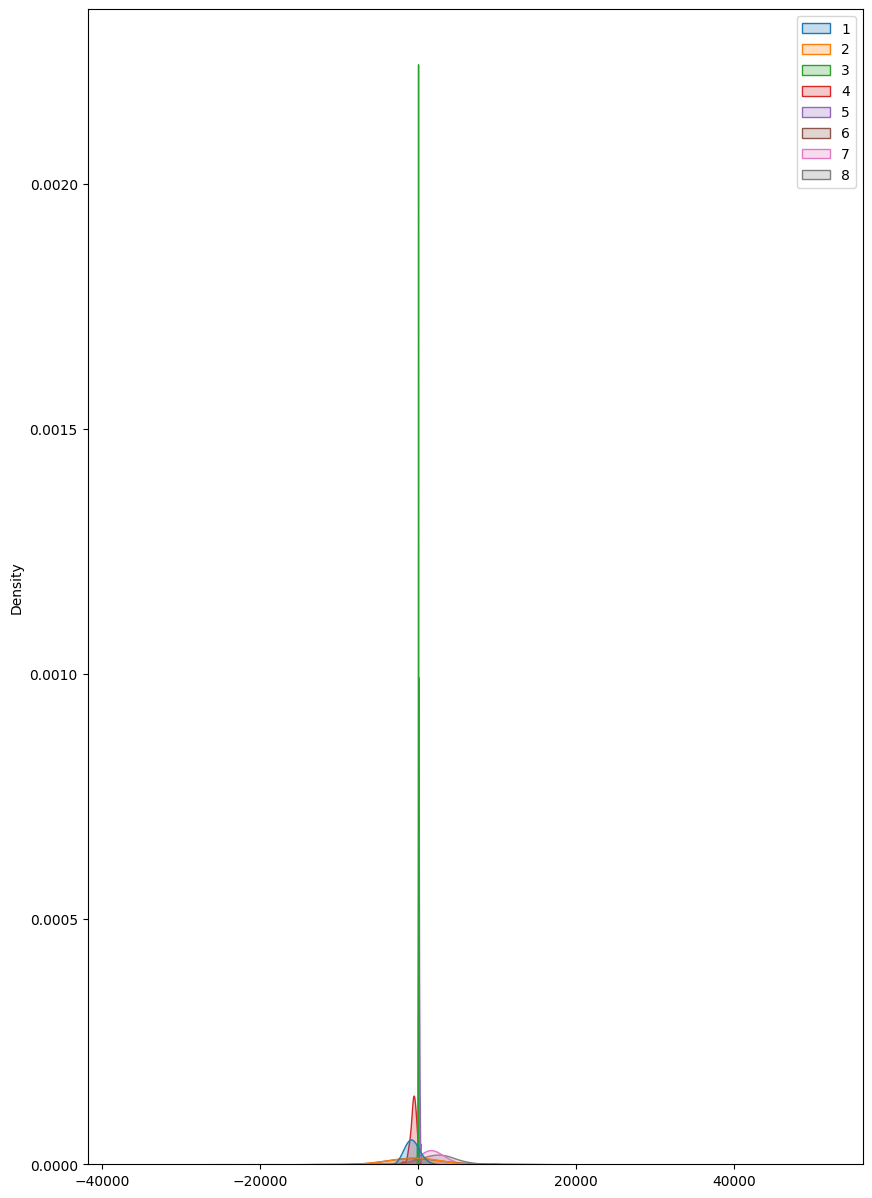

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 15))
distributionPlot = sns.kdeplot(data=averaged_df,fill=True)
plt.show()


## Statistical Testing

In [4]:
from scipy import stats

# Last two agents
xgboost1_avg_balance = averaged_df.iloc[:, -2]  # Second last column
xgboost2_avg_balance = averaged_df.iloc[:, -1]  # Last column

# List to hold the two agents
agents = [xgboost1_avg_balance, xgboost2_avg_balance]

# Loop through the two agents
for agent in agents:
    # Loop through columns 1 to second last for other agents
    for col_index in range(averaged_df.shape[1] - 2):
        other_agent_balance = averaged_df.iloc[:, col_index]
        # Check normality for both columns
        _, pvalue_agent = stats.shapiro(agent)
        _, pvalue_other_agent = stats.shapiro(other_agent_balance)
        print("P_value_agent", pvalue_agent)
        print("pvalue_other_agent ", pvalue_other_agent)
        # If both are normally distributed
        if pvalue_agent > 0.05 and pvalue_other_agent > 0.05:
            print("normal")
            statistic, pvalue = stats.ttest_rel(agent, other_agent_balance)
            if pvalue < 0.05:
                print("There is a statistically significant difference")
            else:
                print("There isn't a statistically significant difference")
        else:
            print("not normal")
            # If either or both are not normally distributed
            statistic, pvalue = stats.wilcoxon(agent, other_agent_balance)
            if pvalue < 0.05:
                print("There is a statistically significant difference")
                print("P-Value", pvalue)
                print("")
            else:
                print("There isn't a statistically significant difference")

P_value_agent 7.752595510648852e-09
pvalue_other_agent  2.7106242190202902e-14
not normal
There is a statistically significant difference
P-Value 1.227493043781731e-11

P_value_agent 7.752595510648852e-09
pvalue_other_agent  1.8589294793857175e-08
not normal
There is a statistically significant difference
P-Value 0.00014307720449163792

P_value_agent 7.752595510648852e-09
pvalue_other_agent  1.4935972519931907e-05
not normal
There is a statistically significant difference
P-Value 1.7815638335758427e-08

P_value_agent 7.752595510648852e-09
pvalue_other_agent  0.0003195777745457692
not normal
There is a statistically significant difference
P-Value 2.4523106024176965e-10

P_value_agent 7.752595510648852e-09
pvalue_other_agent  8.755593242229203e-07
not normal
There is a statistically significant difference
P-Value 4.5787998534290124e-08

P_value_agent 7.752595510648852e-09
pvalue_other_agent  3.005127347594189e-15
not normal
There is a statistically significant difference
P-Value 0.030563

# Stat test with plotting

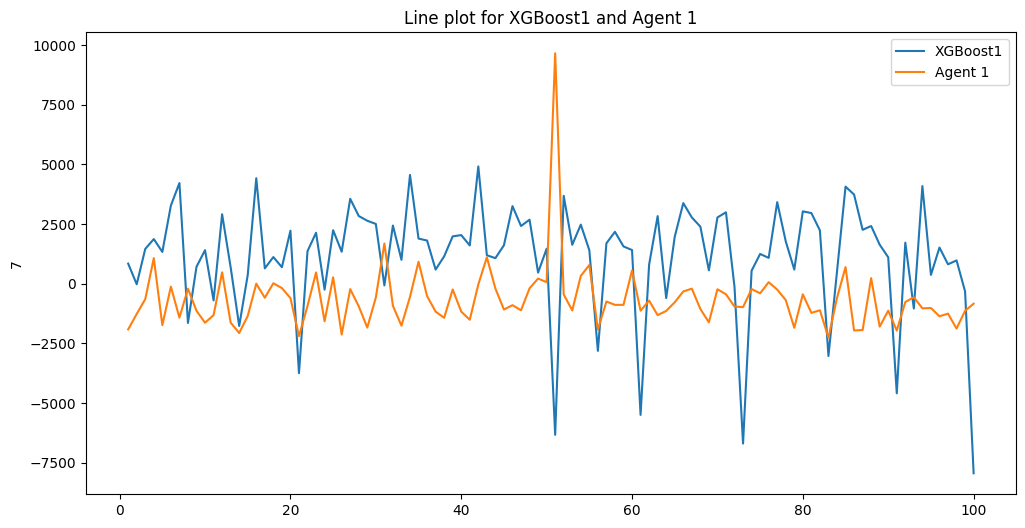

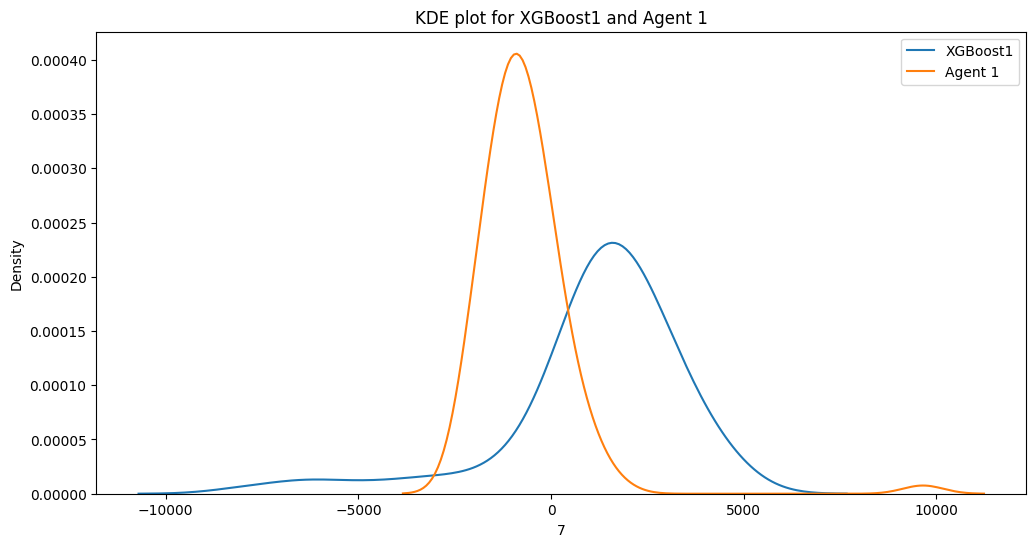

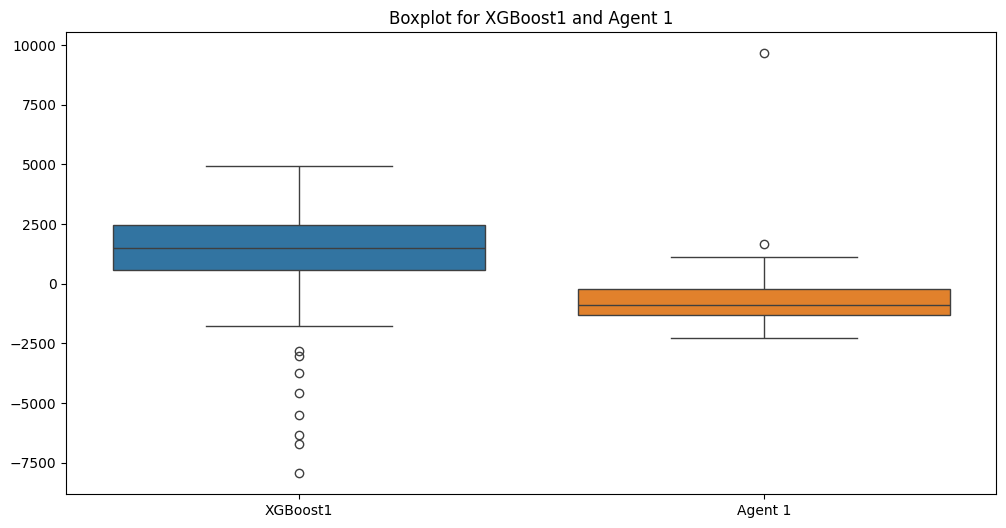

P_value_XGBoost1 7.752595510648852e-09
pvalue_other_agent  2.7106242190202902e-14
not normal
There is a statistically significant difference
P-Value 1.227493043781731e-11



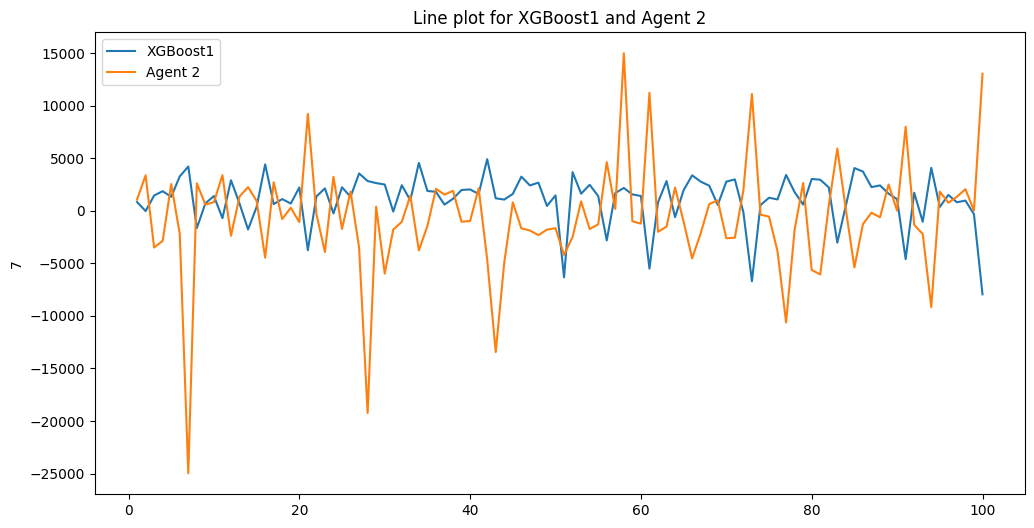

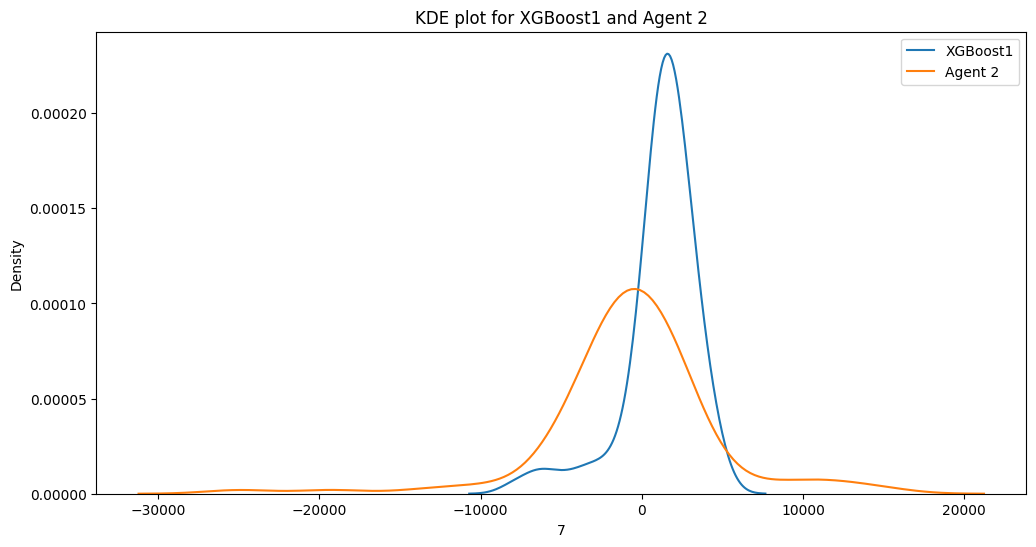

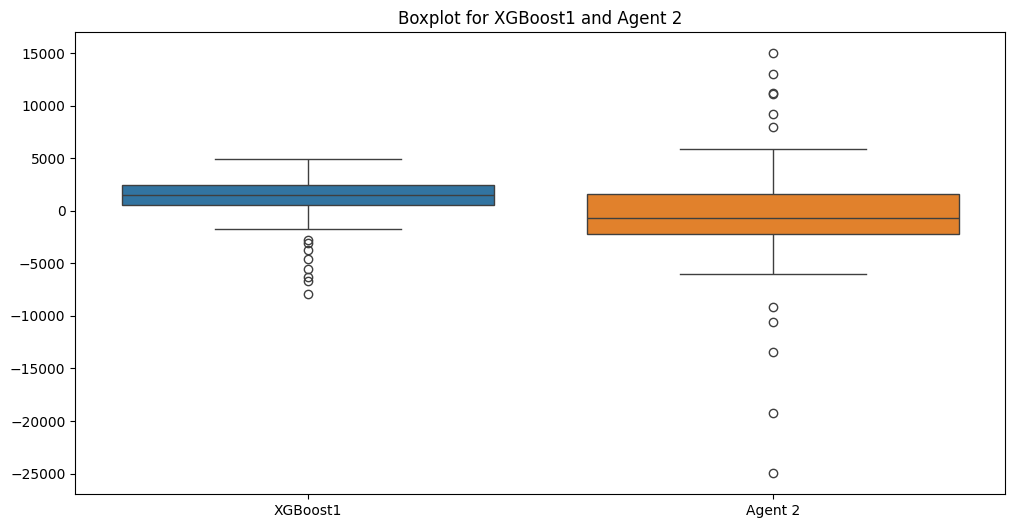

P_value_XGBoost1 7.752595510648852e-09
pvalue_other_agent  1.8589294793857175e-08
not normal
There is a statistically significant difference
P-Value 0.00014307720449163792



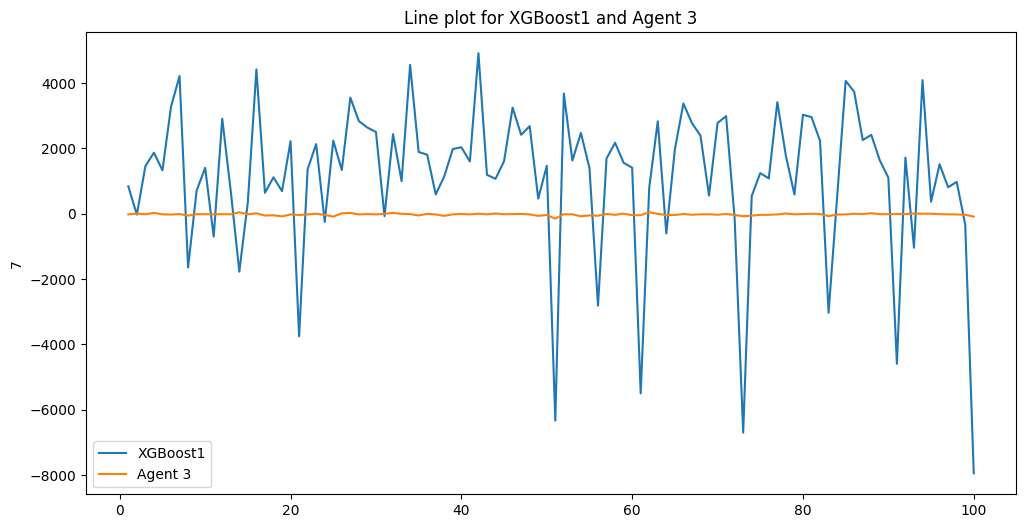

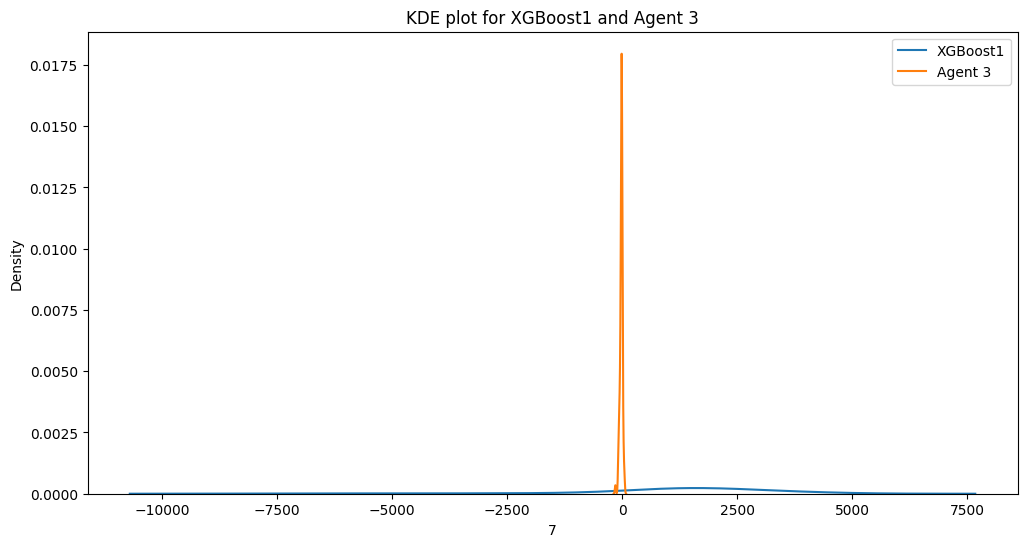

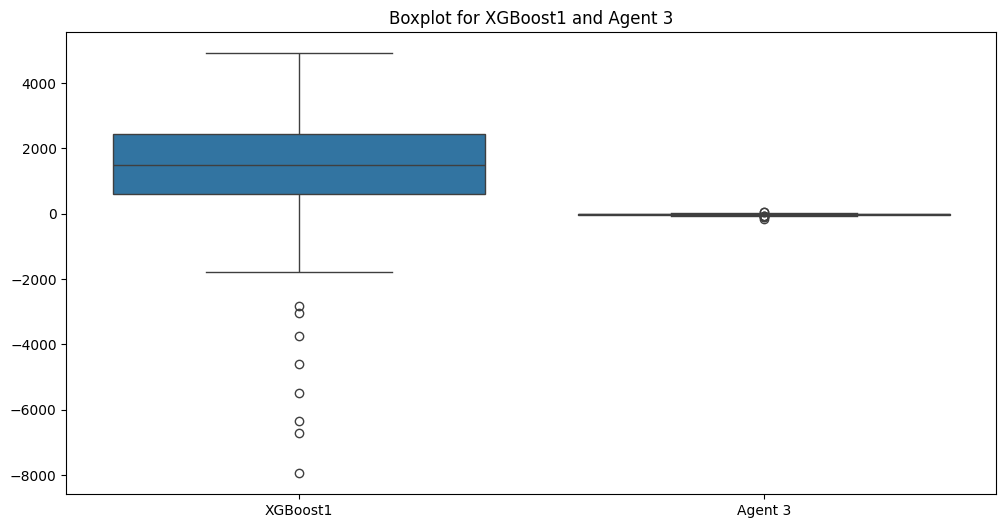

P_value_XGBoost1 7.752595510648852e-09
pvalue_other_agent  1.4935972519931907e-05
not normal
There is a statistically significant difference
P-Value 1.7815638335758427e-08



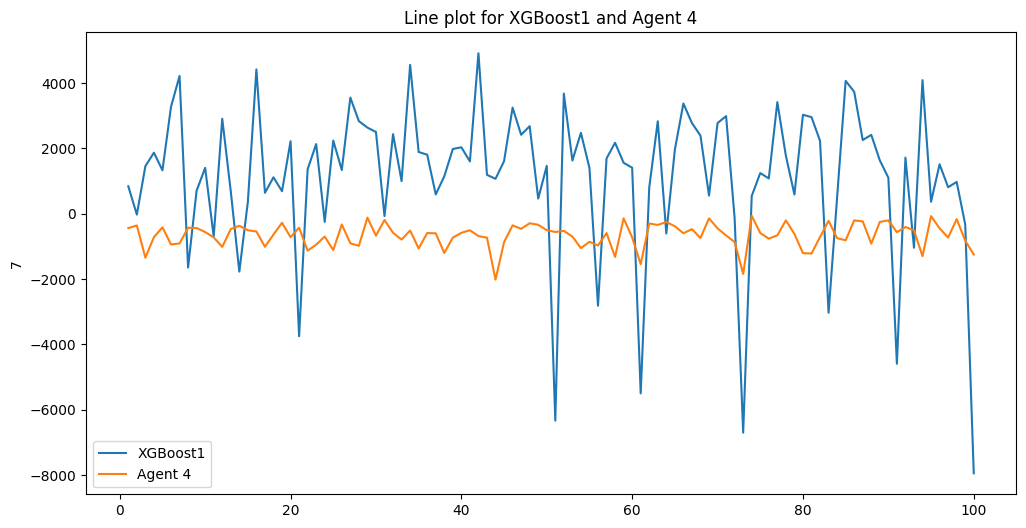

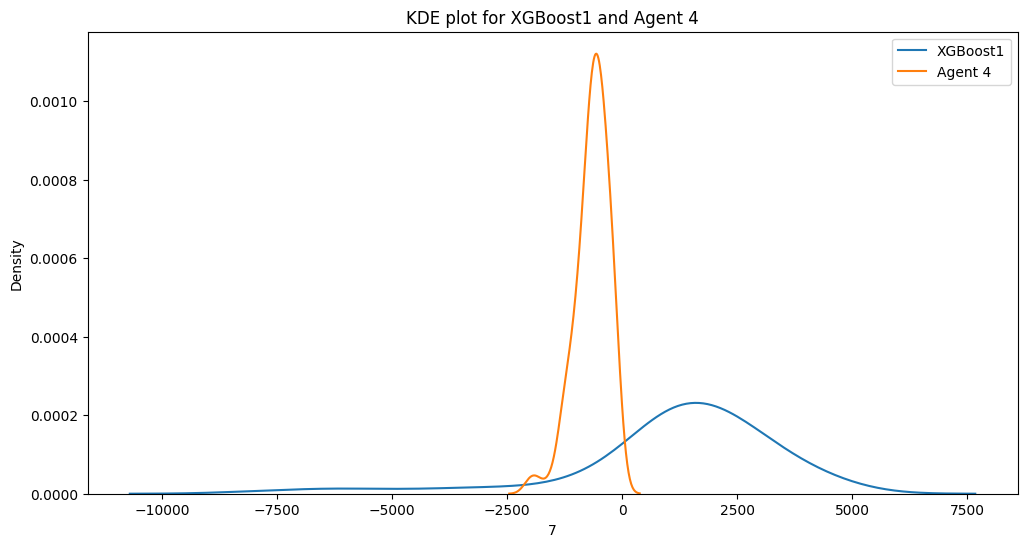

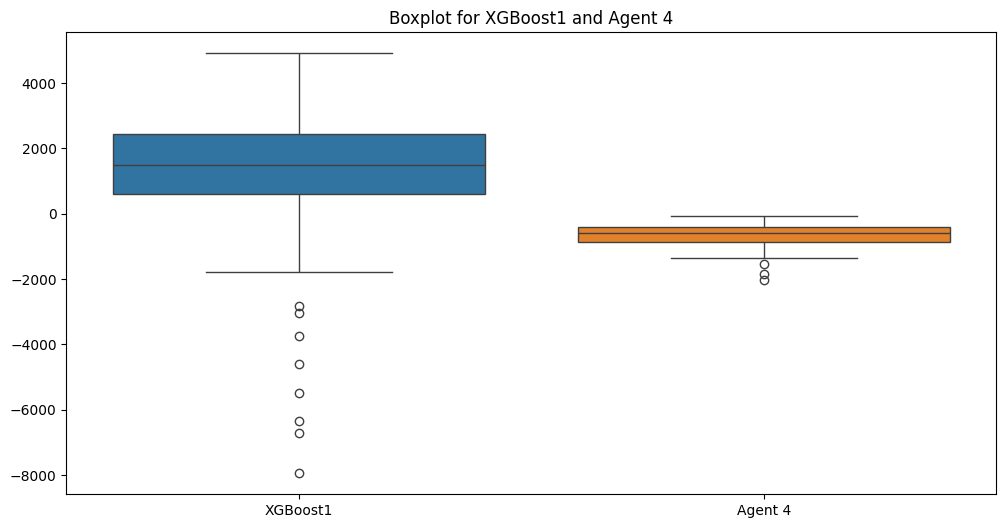

P_value_XGBoost1 7.752595510648852e-09
pvalue_other_agent  0.0003195777745457692
not normal
There is a statistically significant difference
P-Value 2.4523106024176965e-10



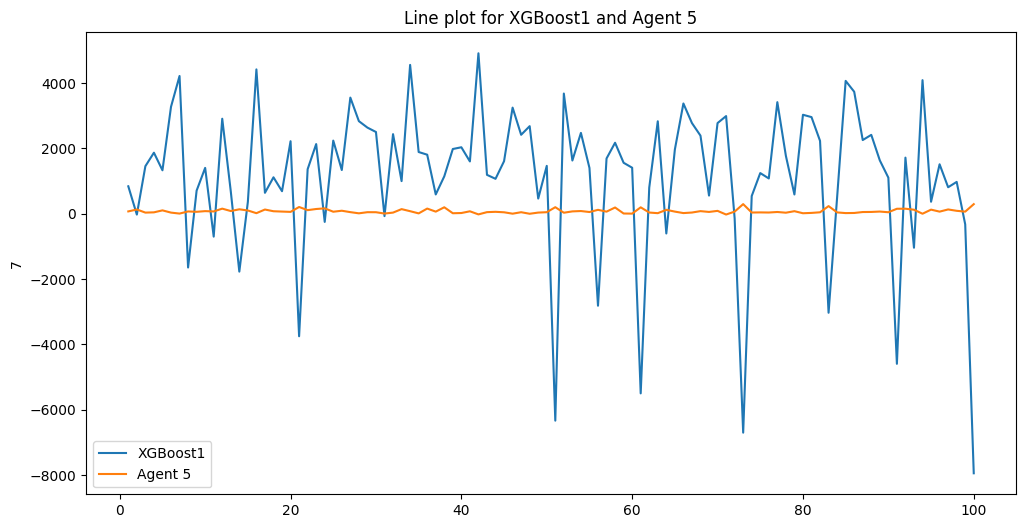

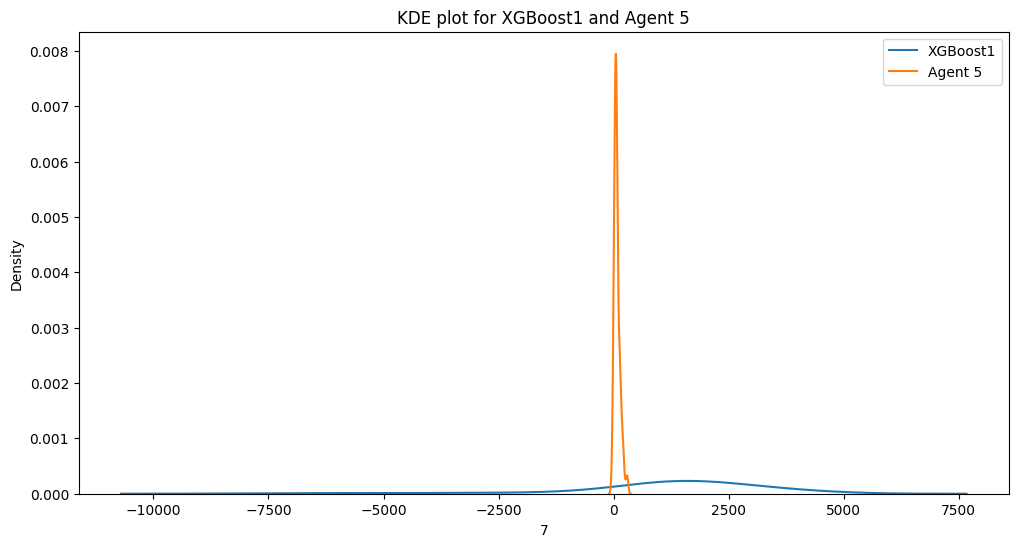

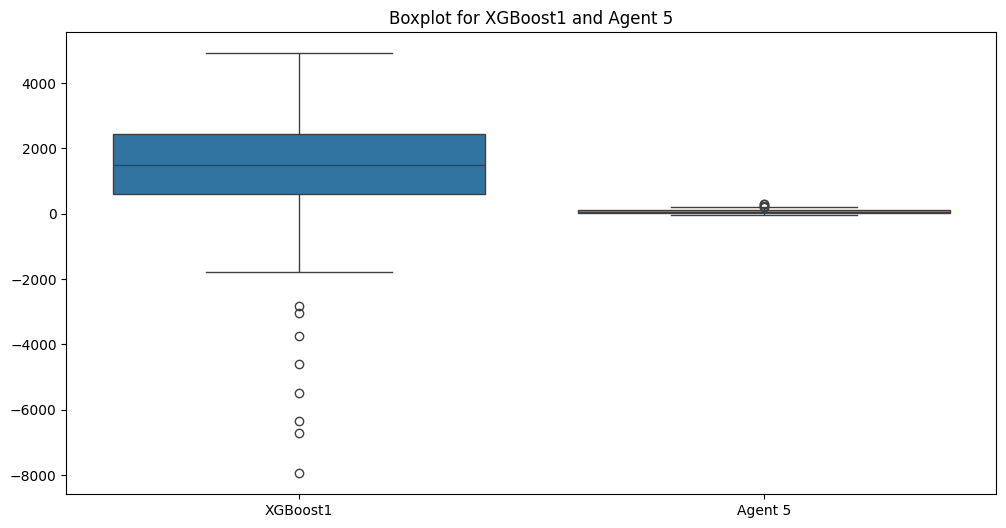

P_value_XGBoost1 7.752595510648852e-09
pvalue_other_agent  8.755593242229203e-07
not normal
There is a statistically significant difference
P-Value 4.5787998534290124e-08



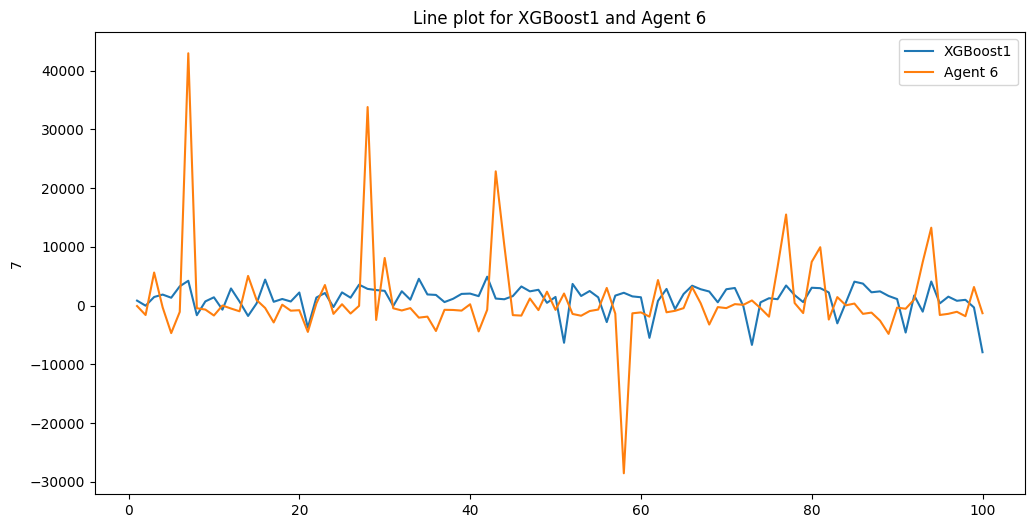

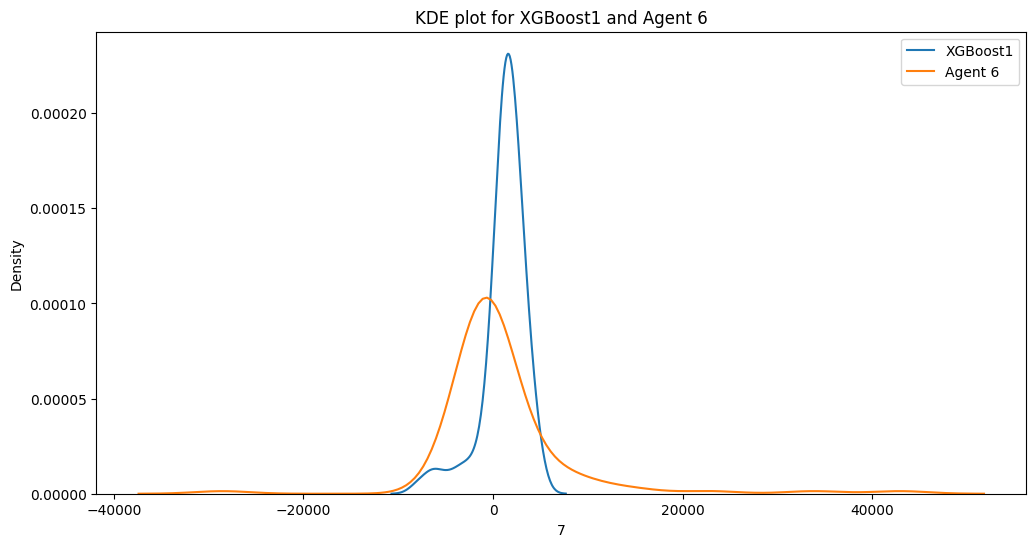

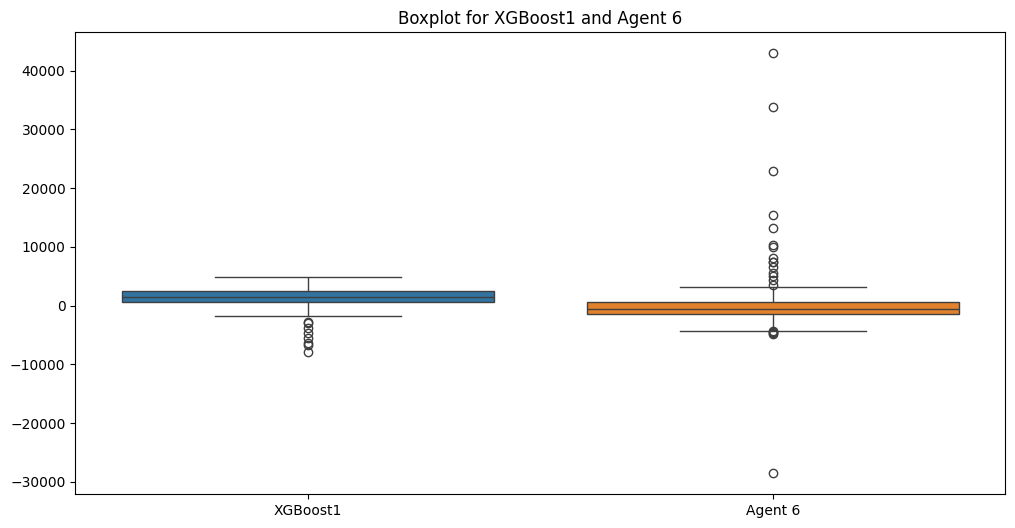

P_value_XGBoost1 7.752595510648852e-09
pvalue_other_agent  3.005127347594189e-15
not normal
There is a statistically significant difference
P-Value 0.030563774193336772



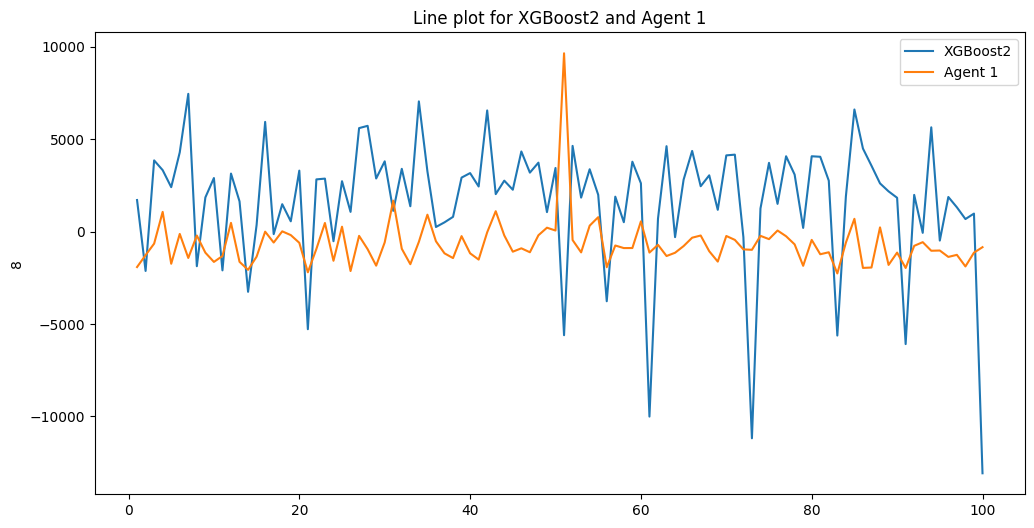

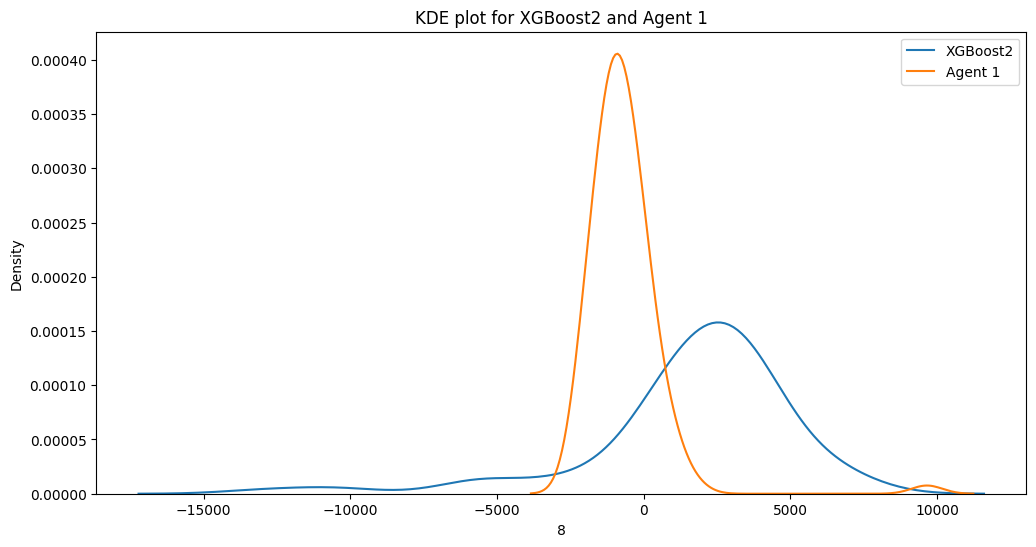

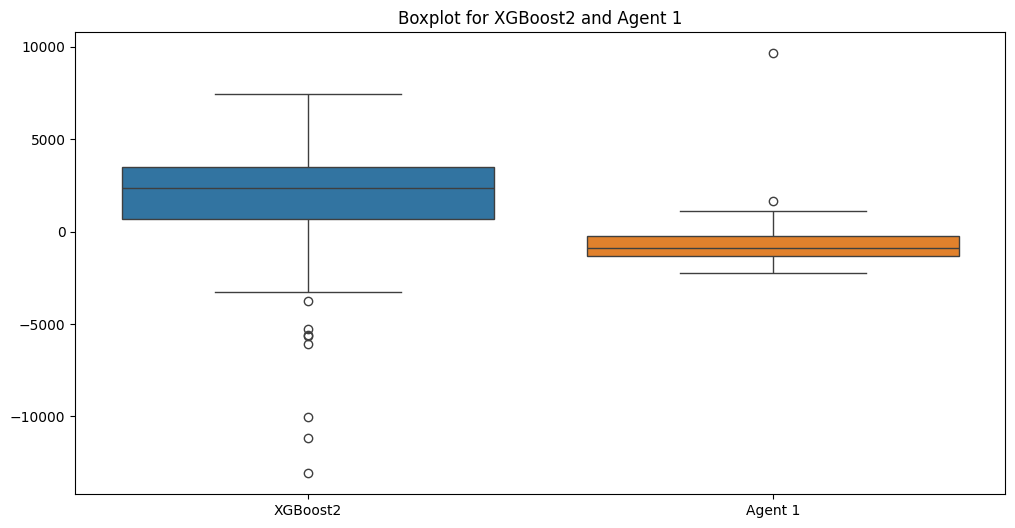

P_value_XGBoost2 3.497432317725132e-09
pvalue_other_agent  2.7106242190202902e-14
not normal
There is a statistically significant difference
P-Value 9.521106397643388e-11



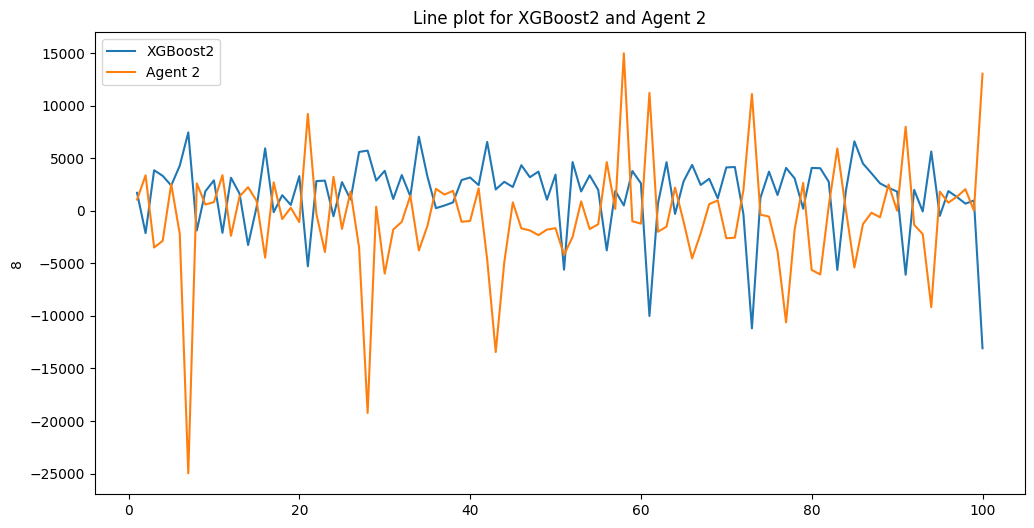

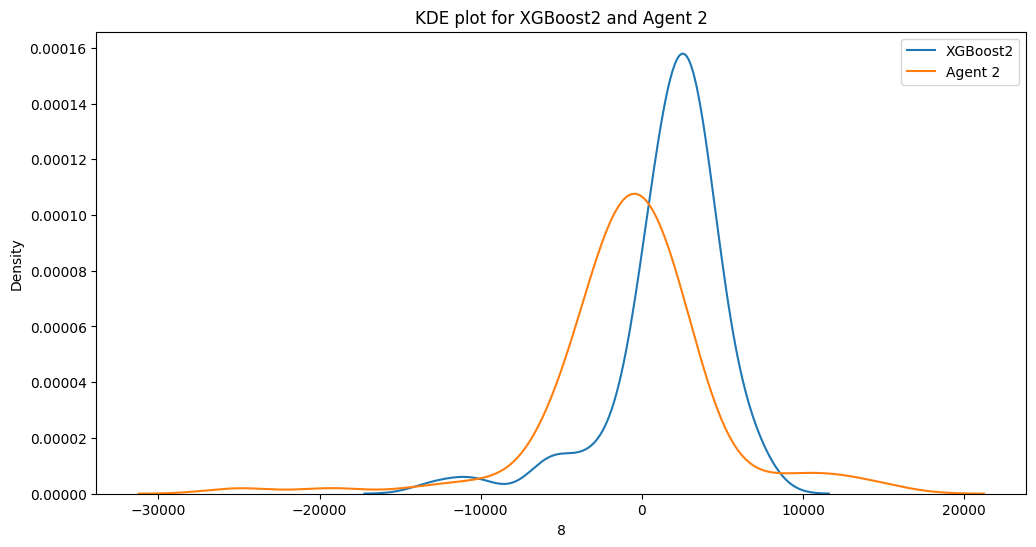

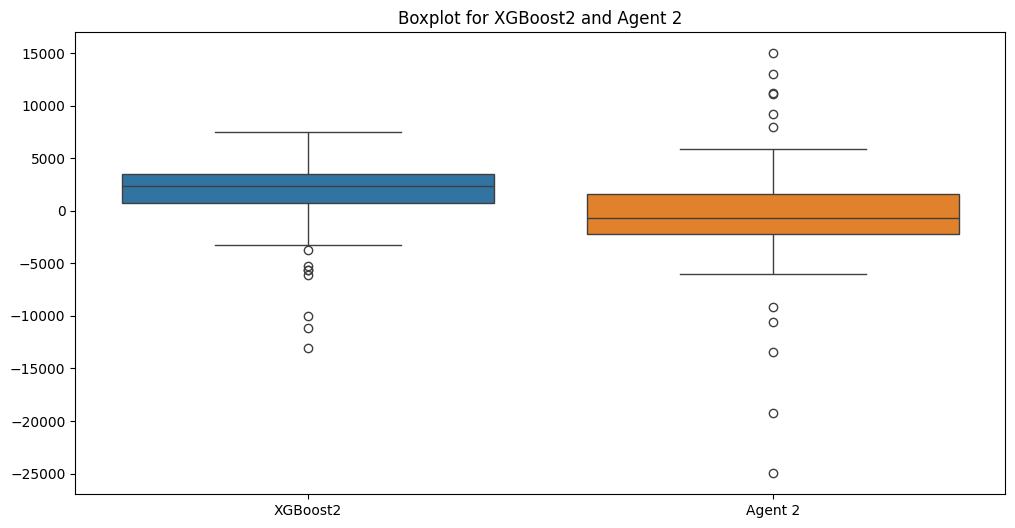

P_value_XGBoost2 3.497432317725132e-09
pvalue_other_agent  1.8589294793857175e-08
not normal
There is a statistically significant difference
P-Value 3.082967206861299e-05



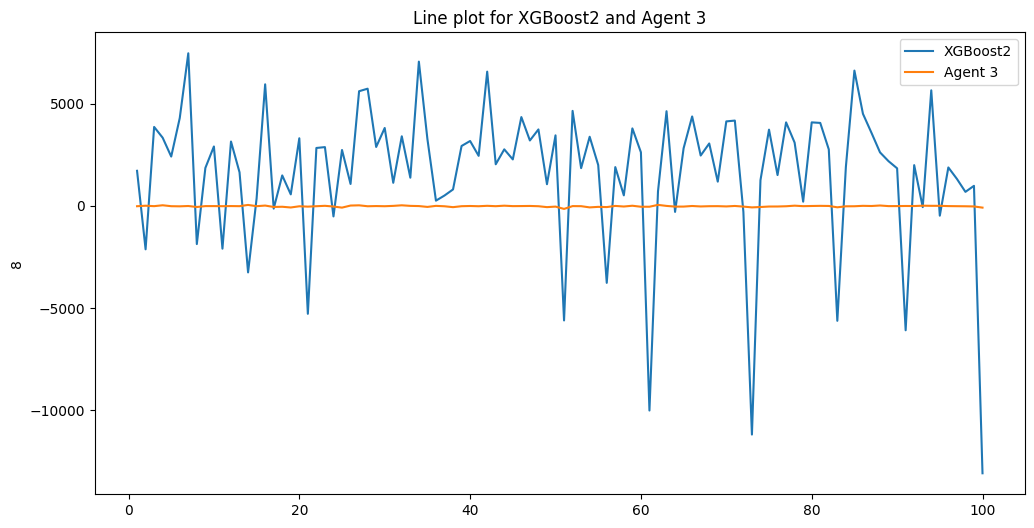

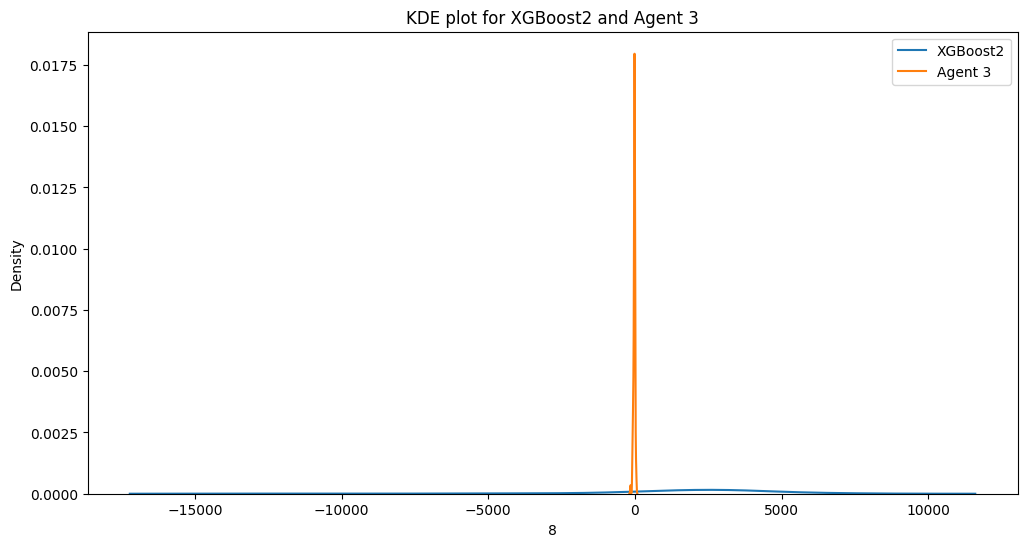

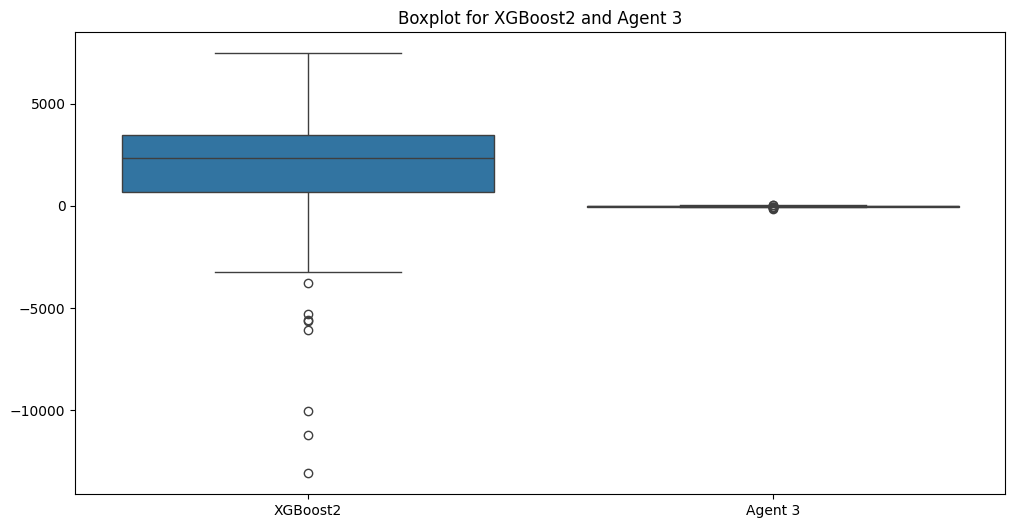

P_value_XGBoost2 3.497432317725132e-09
pvalue_other_agent  1.4935972519931907e-05
not normal
There is a statistically significant difference
P-Value 3.2238025664929246e-08



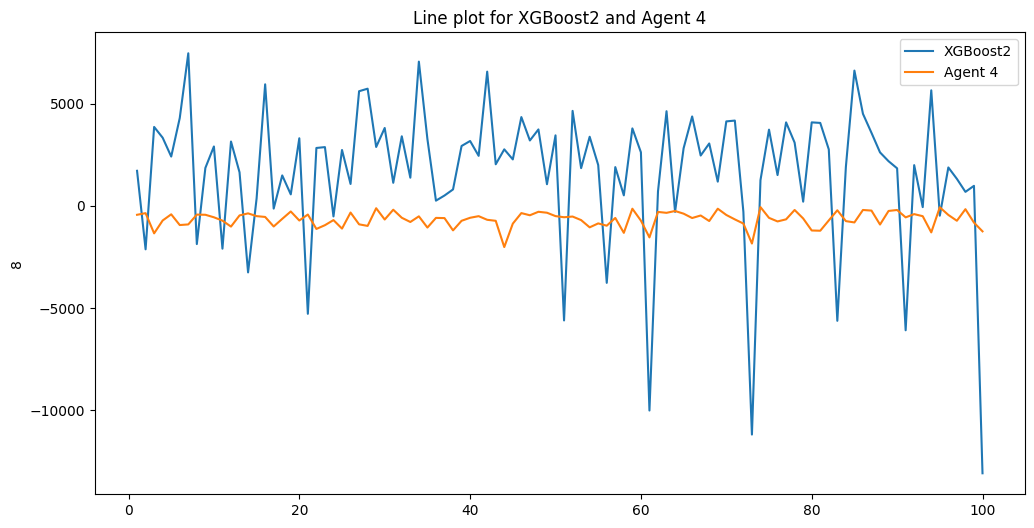

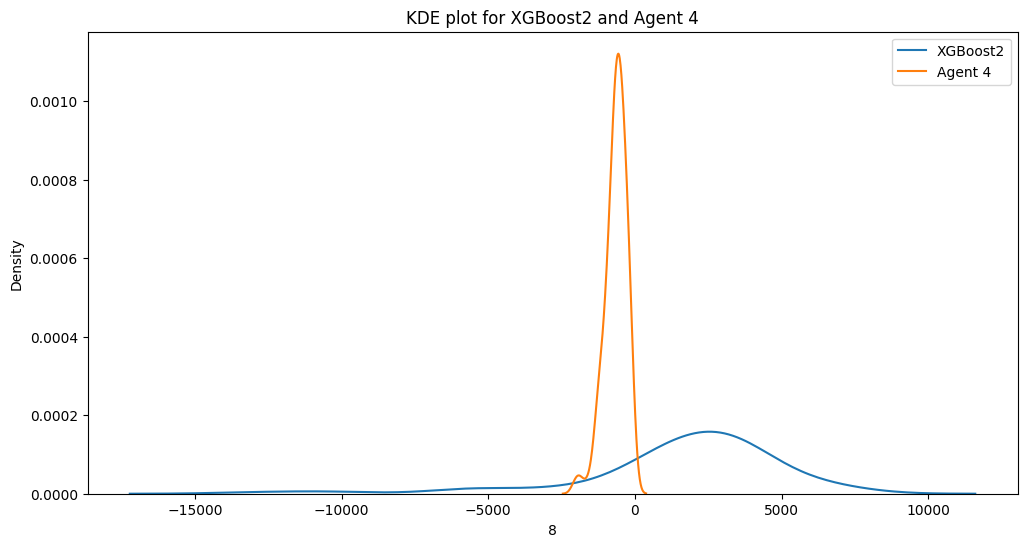

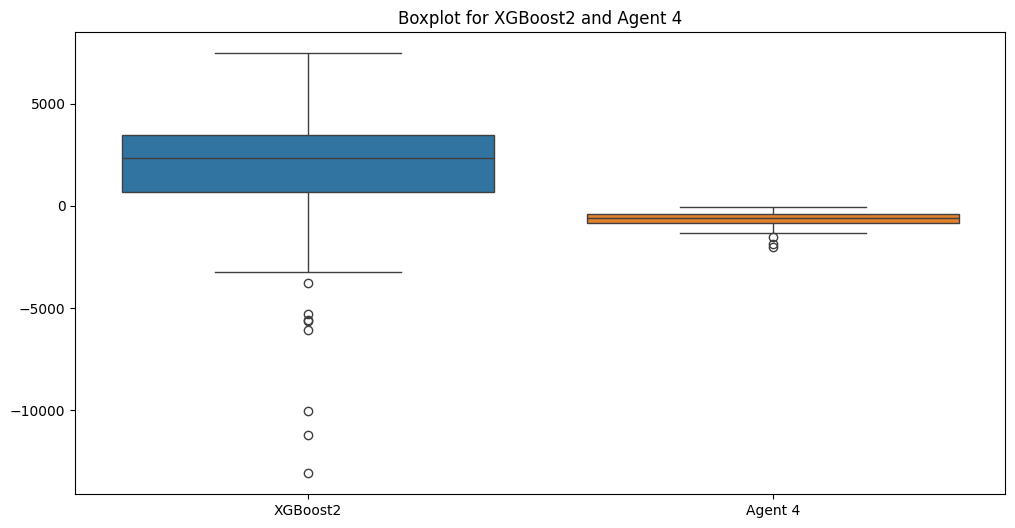

P_value_XGBoost2 3.497432317725132e-09
pvalue_other_agent  0.0003195777745457692
not normal
There is a statistically significant difference
P-Value 1.9746723075771296e-09



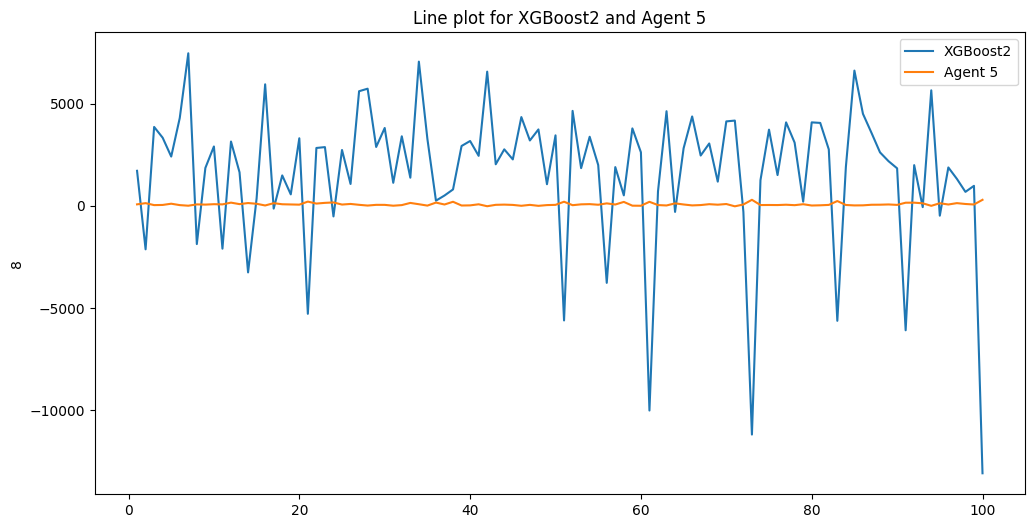

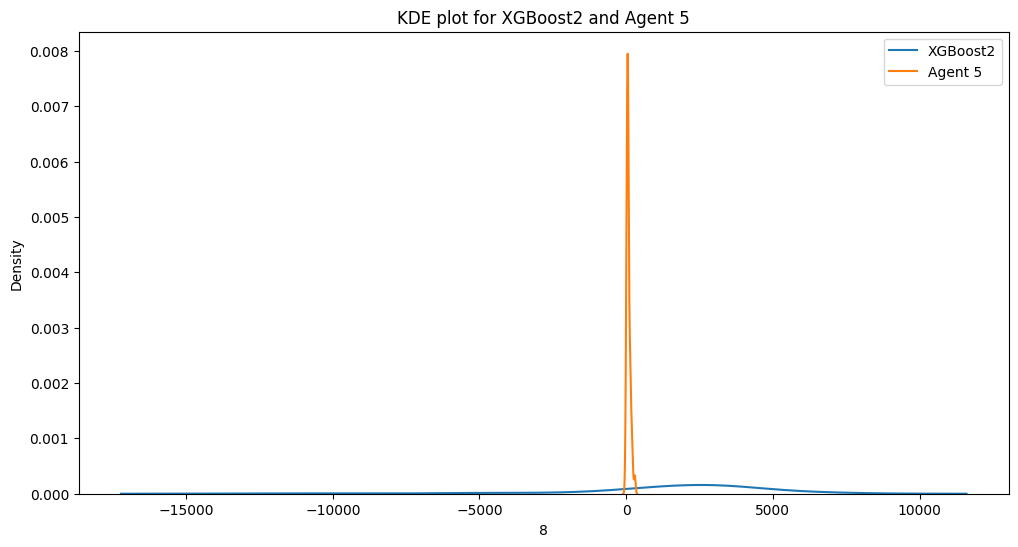

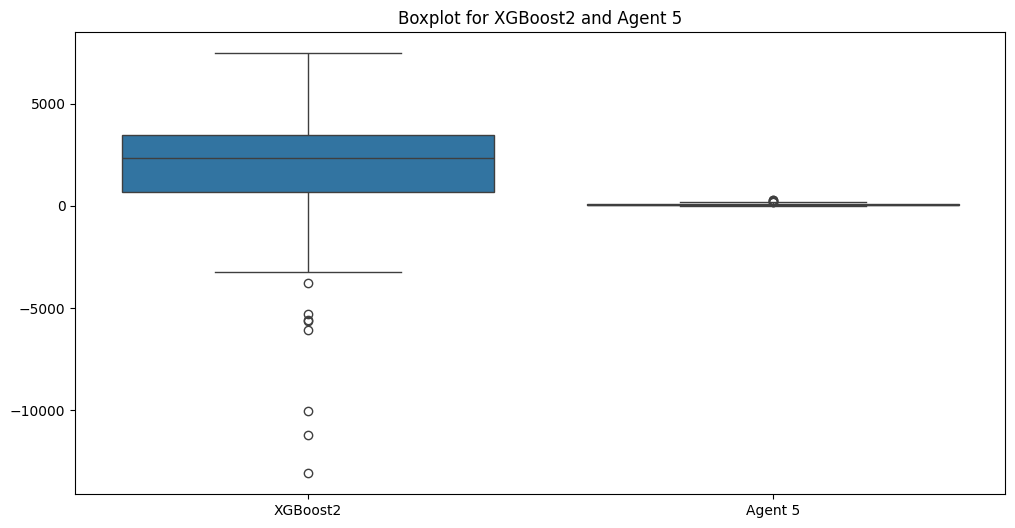

P_value_XGBoost2 3.497432317725132e-09
pvalue_other_agent  8.755593242229203e-07
not normal
There is a statistically significant difference
P-Value 7.696539755328664e-08



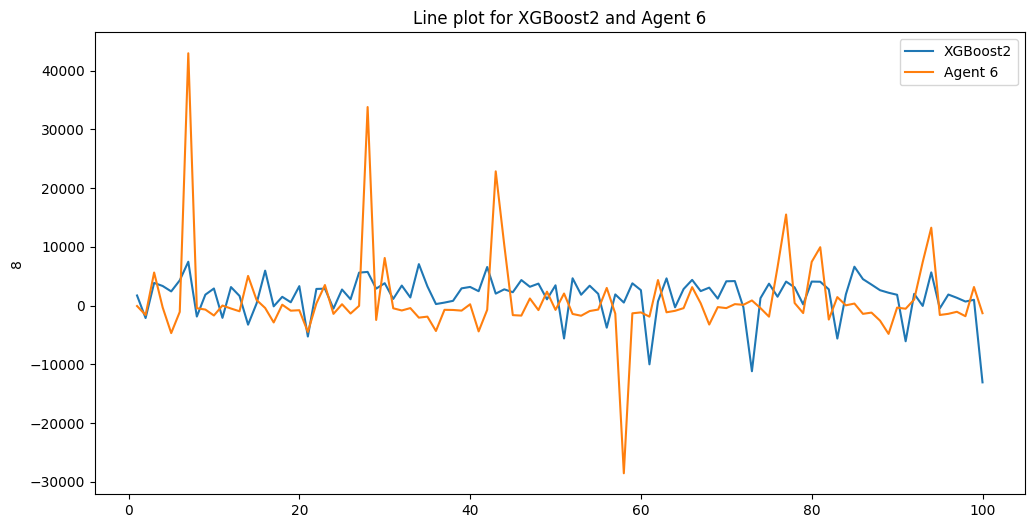

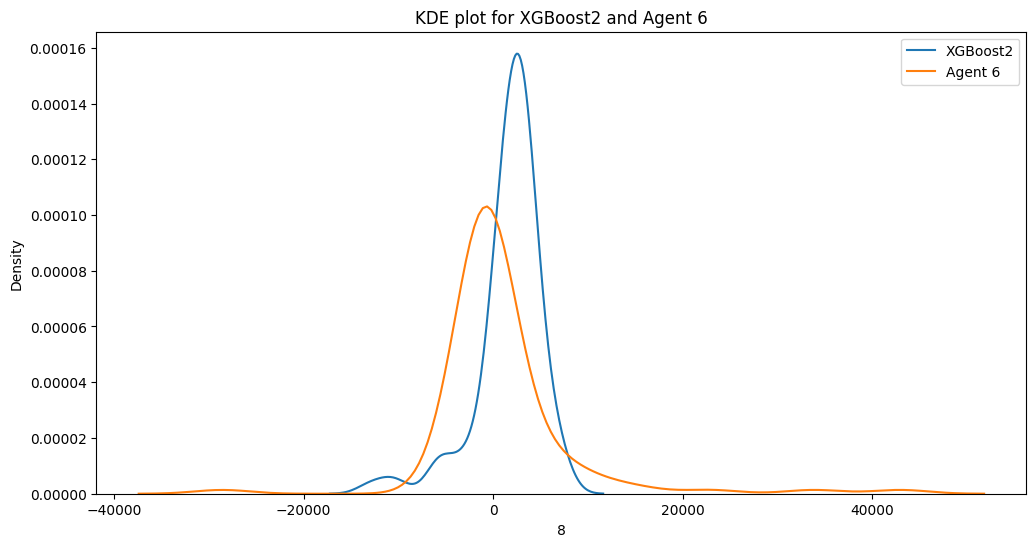

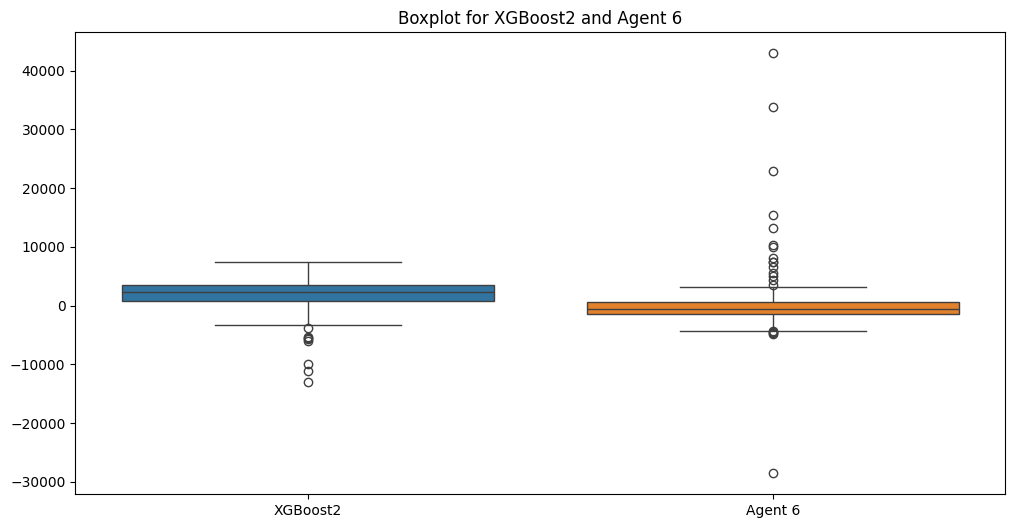

P_value_XGBoost2 3.497432317725132e-09
pvalue_other_agent  3.005127347594189e-15
not normal
There is a statistically significant difference
P-Value 0.008026609021899512



In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Last two agents
xgboost1_avg_balance = averaged_df.iloc[:, -2]  # Second last column
xgboost2_avg_balance = averaged_df.iloc[:, -1]  # Last column

# List to hold the two agents
agents = [
    ("XGBoost1", xgboost1_avg_balance),
    ("XGBoost2", xgboost2_avg_balance),
]

# Loop through the two agents
for agent_name, agent in agents:
    # Loop through columns 1 to second last for other agents
    for col_index in range(averaged_df.shape[1] - 2):
        other_agent_balance = averaged_df.iloc[:, col_index]

        # Line plot for XGBoost and the other agent
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=agent, label=agent_name)
        sns.lineplot(data=other_agent_balance, label="Agent " + str(col_index + 1))
        plt.title("Line plot for " + agent_name + " and Agent " + str(col_index + 1))
        plt.legend()
        plt.show()

        # KDE plot for the distributions
        plt.figure(figsize=(12, 6))
        sns.kdeplot(agent, label=agent_name)
        sns.kdeplot(other_agent_balance, label="Agent " + str(col_index + 1))
        plt.title("KDE plot for " + agent_name + " and Agent " + str(col_index + 1))
        plt.legend()
        plt.show()

        # Boxplot for the two distributions
        combined_data = pd.concat(
            [
                agent.rename(agent_name),
                other_agent_balance.rename("Agent " + str(col_index + 1)),
            ],
            axis=1,
        )
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=combined_data)
        plt.title("Boxplot for " + agent_name + " and Agent " + str(col_index + 1))
        plt.show()

        # Check normality for both columns
        _, pvalue_xgboost = stats.shapiro(agent)
        _, pvalue_other_agent = stats.shapiro(other_agent_balance)
        print("P_value_" + agent_name, pvalue_xgboost)
        print("pvalue_other_agent ", pvalue_other_agent)

        # If both are normally distributed
        if pvalue_xgboost > 0.05 and pvalue_other_agent > 0.05:
            print("normal")
            statistic, pvalue = stats.ttest_rel(agent, other_agent_balance)
            if pvalue < 0.05:
                print("There is a statistically significant difference")
            else:
                print("There isn't a statistically significant difference")
        else:
            print("not normal")
            # If either or both are not normally distributed
            statistic, pvalue = stats.wilcoxon(agent, other_agent_balance)
            if pvalue < 0.05:
                print("There is a statistically significant difference")
                print("P-Value", pvalue)
                print("")
            else:
                print("There isn't a statistically significant difference")

In [11]:
averaged_df.shape

(100, 8)

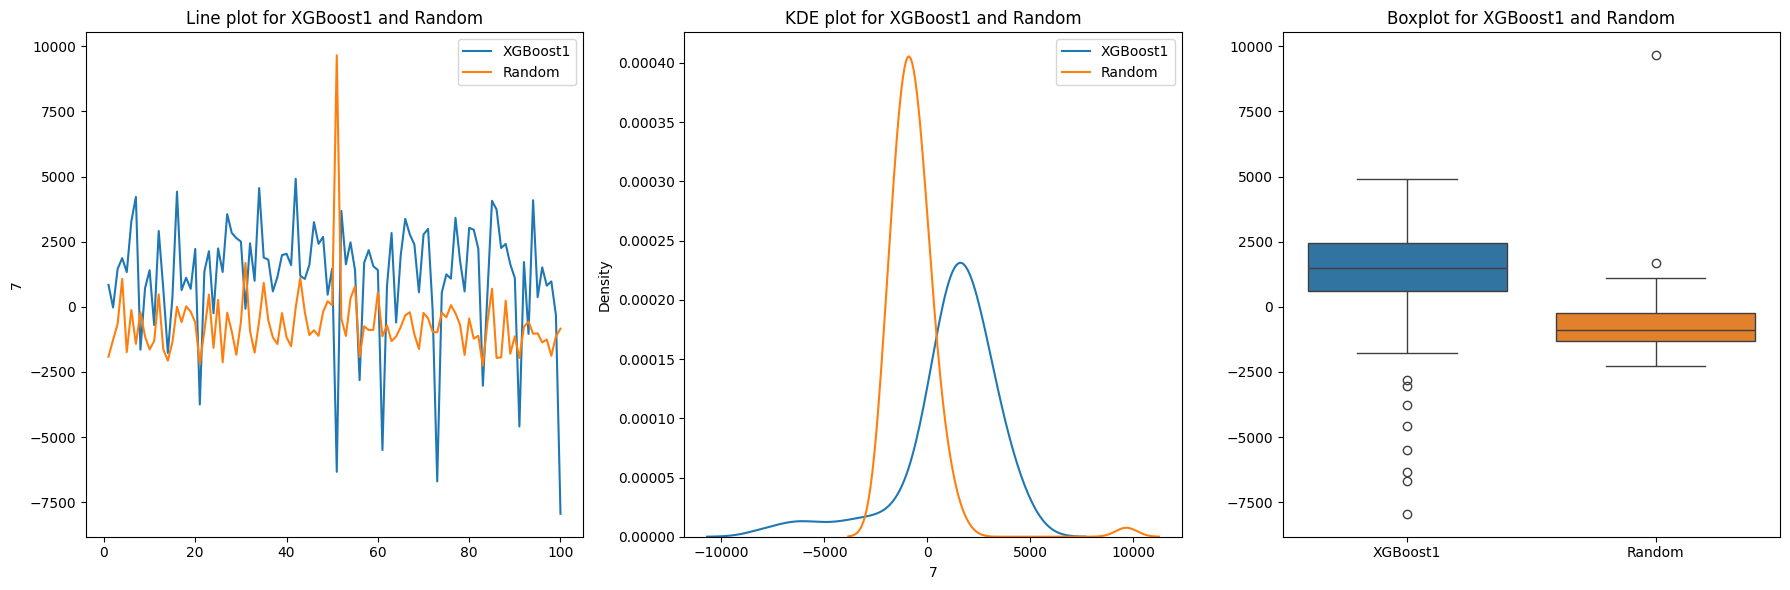

P_value_XGBoost1 7.752595510648852e-09
P_value_Random 2.7106242190202902e-14
not normal
There is a statistically significant difference
P-Value 1.227493043781731e-11



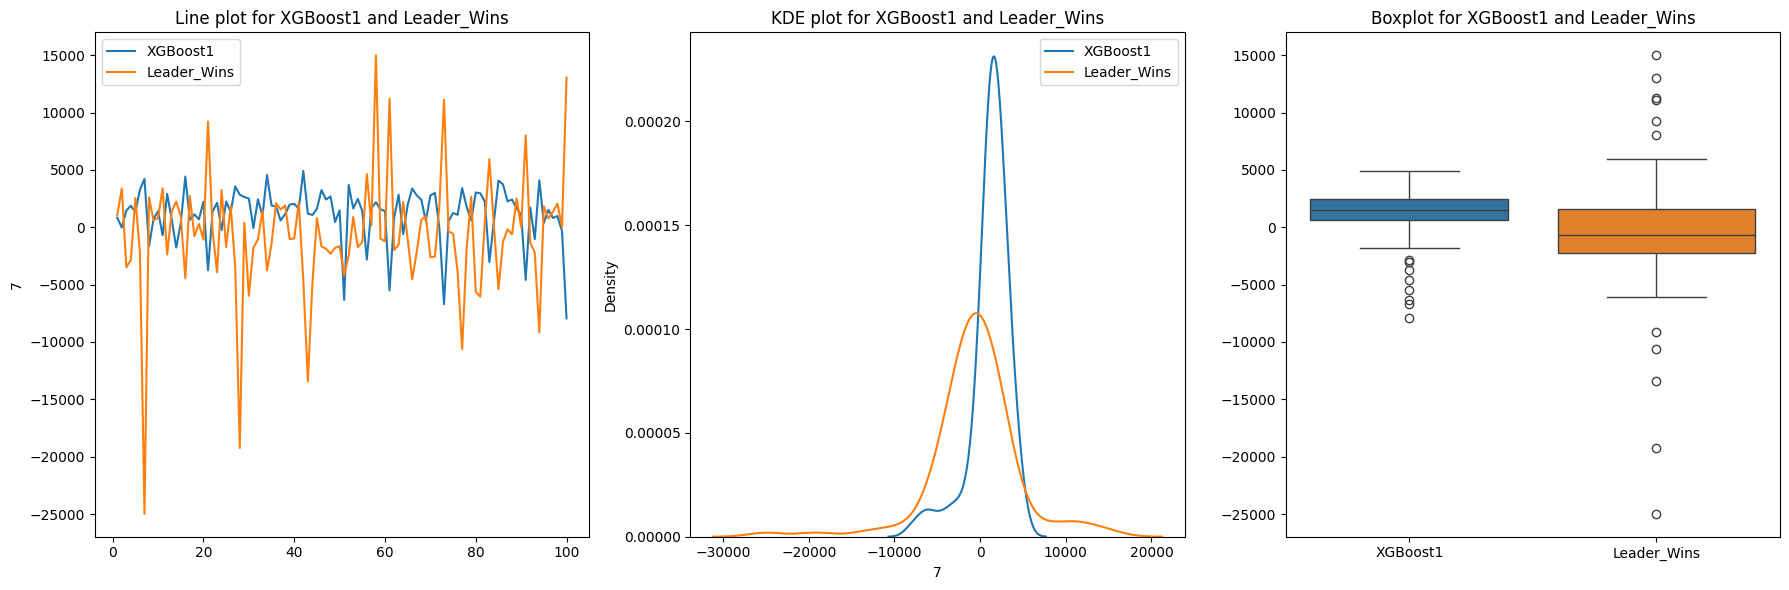

P_value_XGBoost1 7.752595510648852e-09
P_value_Leader_Wins 1.8589294793857175e-08
not normal
There is a statistically significant difference
P-Value 0.00014307720449163792



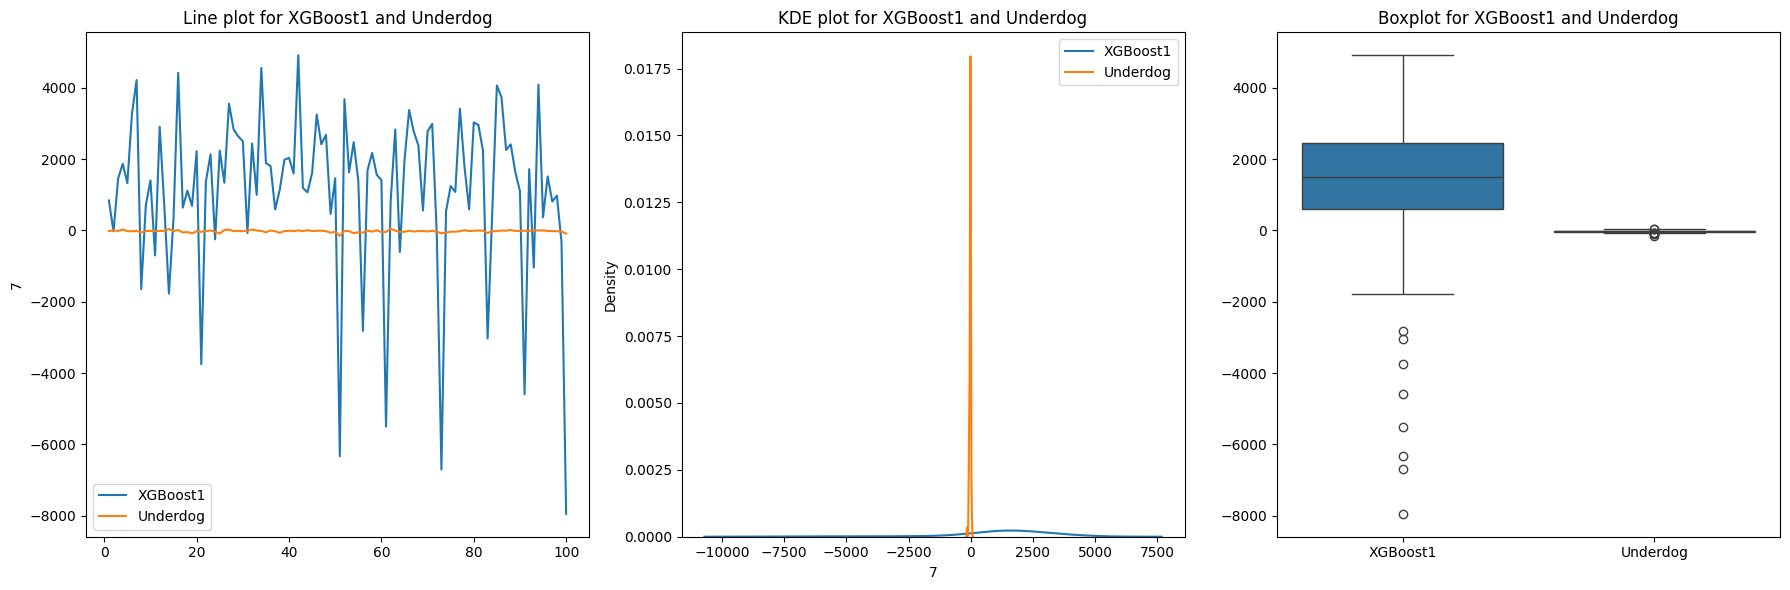

P_value_XGBoost1 7.752595510648852e-09
P_value_Underdog 1.4935972519931907e-05
not normal
There is a statistically significant difference
P-Value 1.7815638335758427e-08



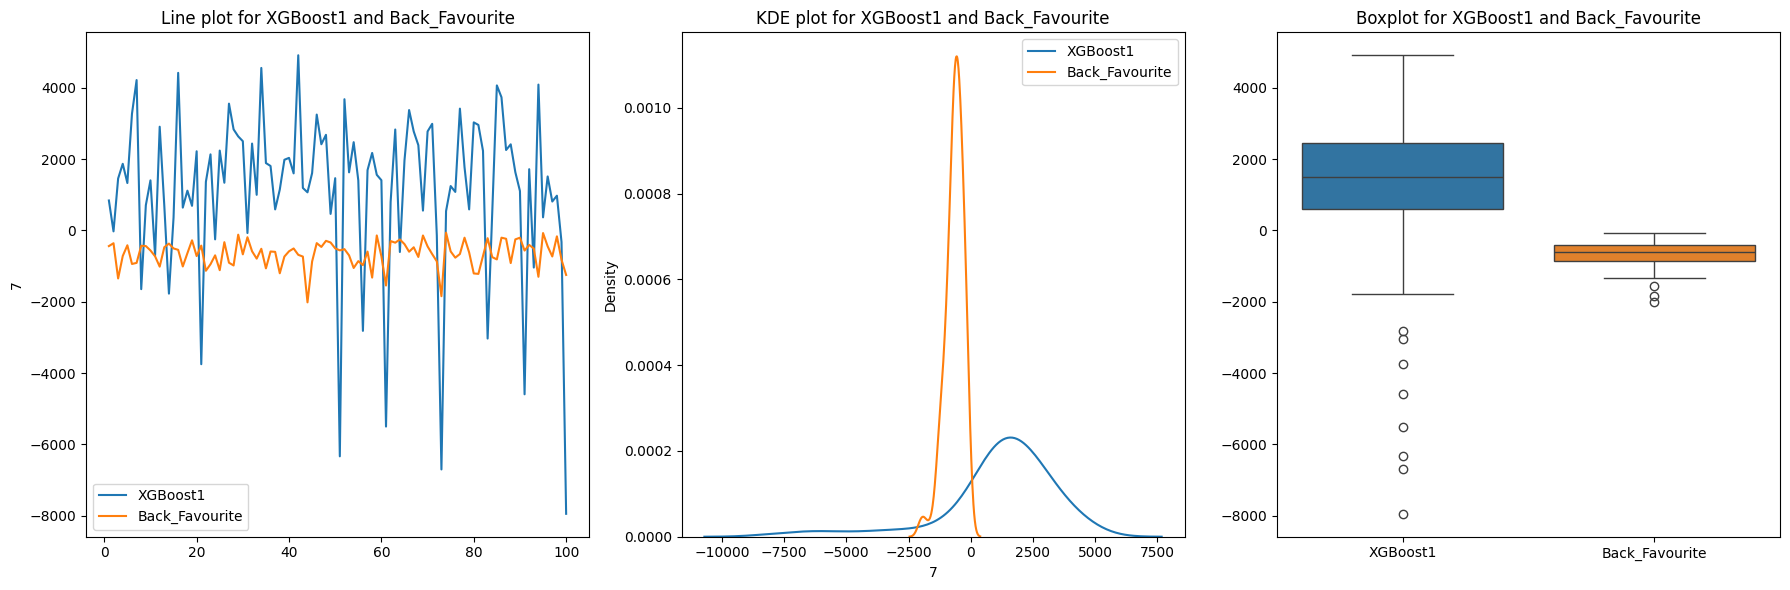

P_value_XGBoost1 7.752595510648852e-09
P_value_Back_Favourite 0.0003195777745457692
not normal
There is a statistically significant difference
P-Value 2.4523106024176965e-10



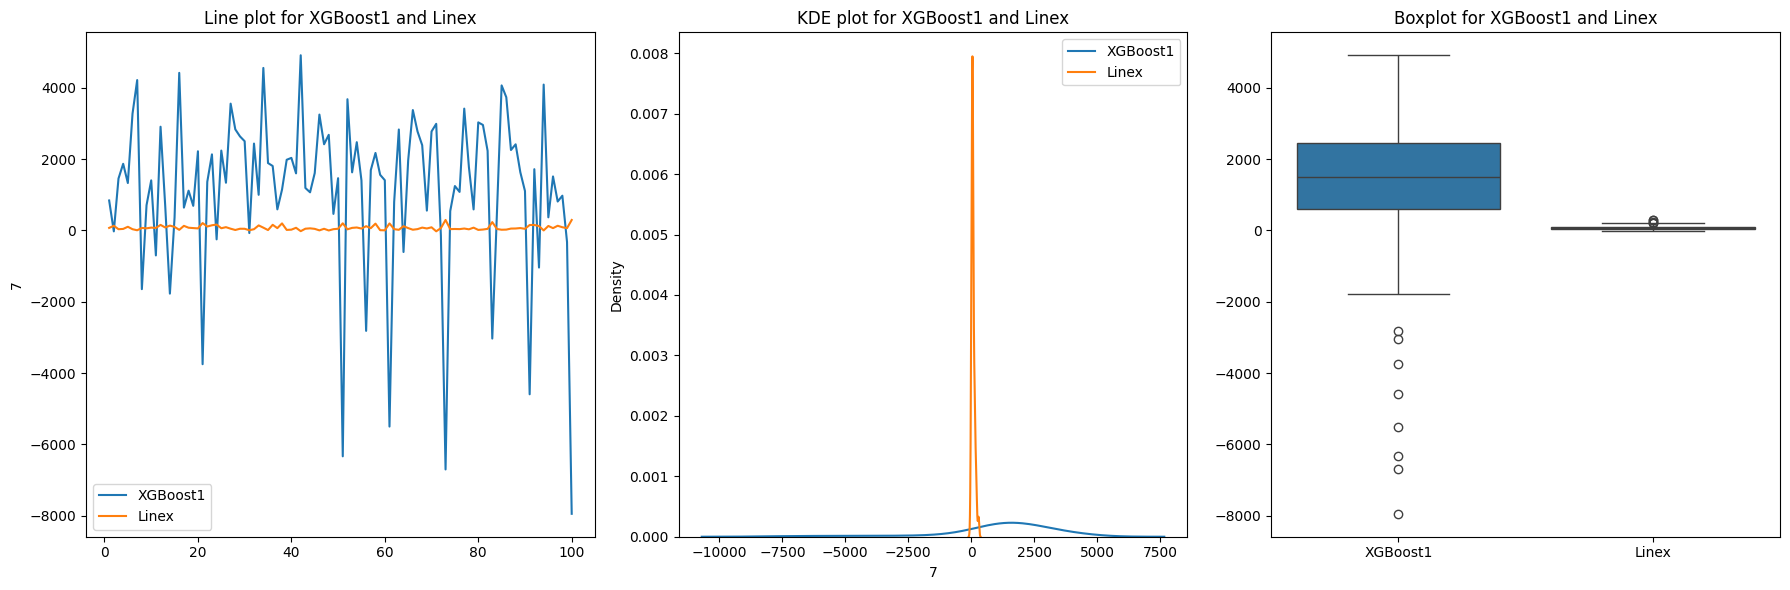

P_value_XGBoost1 7.752595510648852e-09
P_value_Linex 8.755593242229203e-07
not normal
There is a statistically significant difference
P-Value 4.5787998534290124e-08



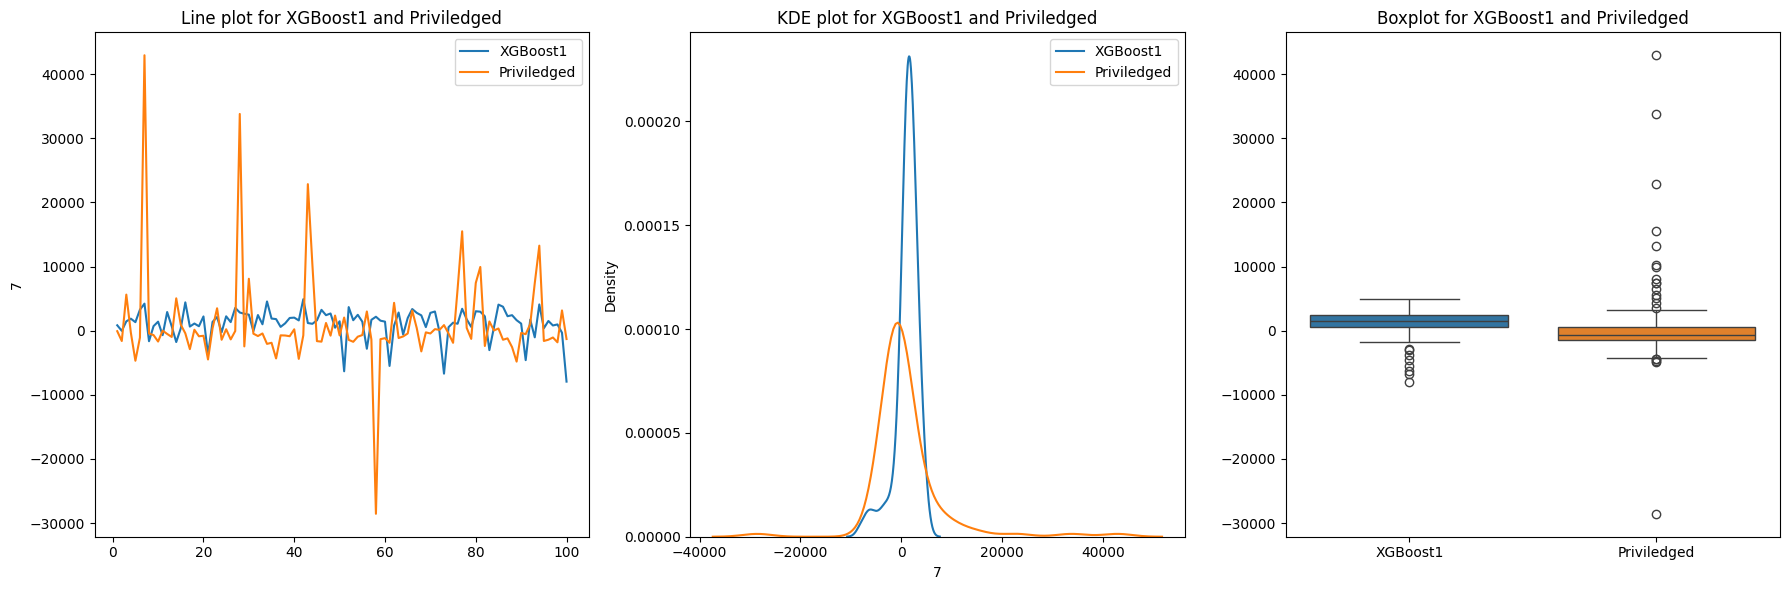

P_value_XGBoost1 7.752595510648852e-09
P_value_Priviledged 3.005127347594189e-15
not normal
There is a statistically significant difference
P-Value 0.030563774193336772



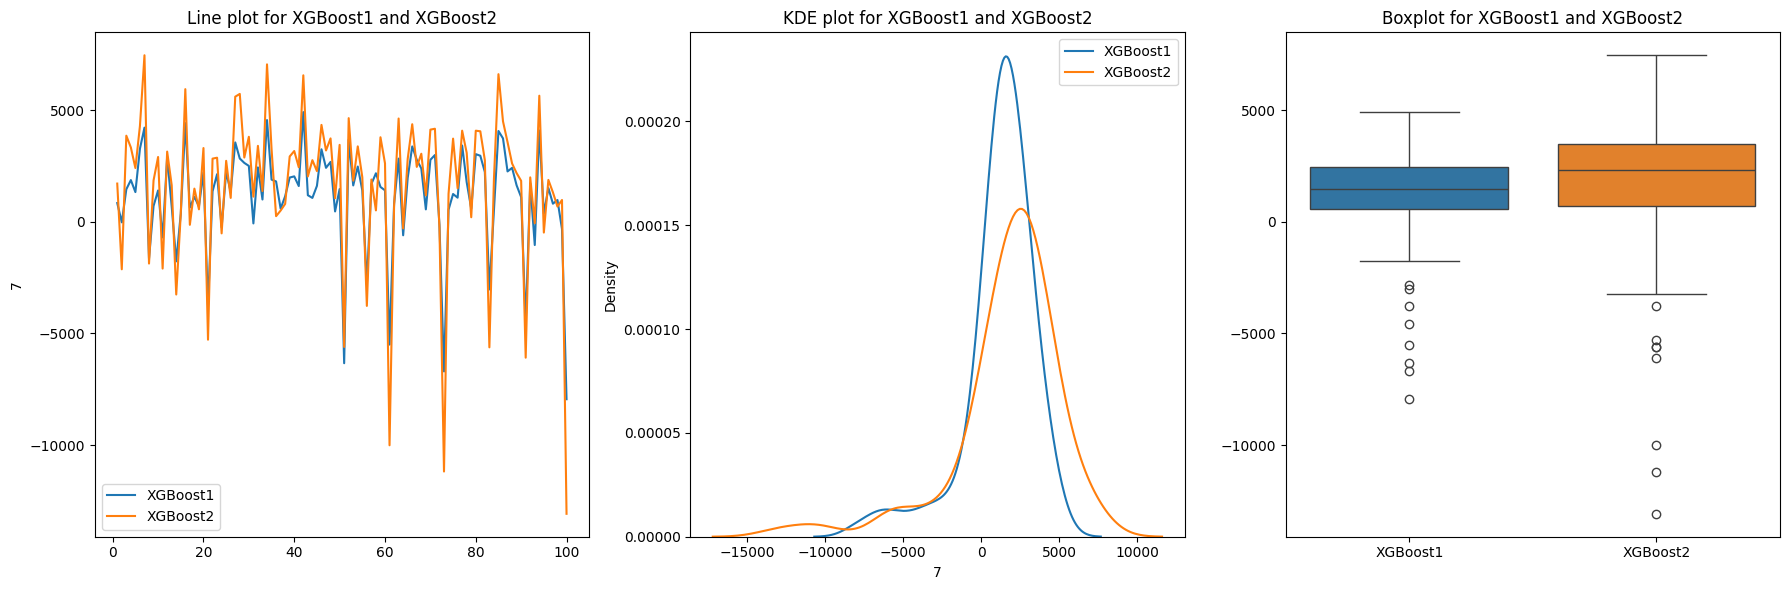

P_value_XGBoost1 7.752595510648852e-09
P_value_XGBoost2 3.497432317725132e-09
not normal
There is a statistically significant difference
P-Value 5.481399021085466e-06



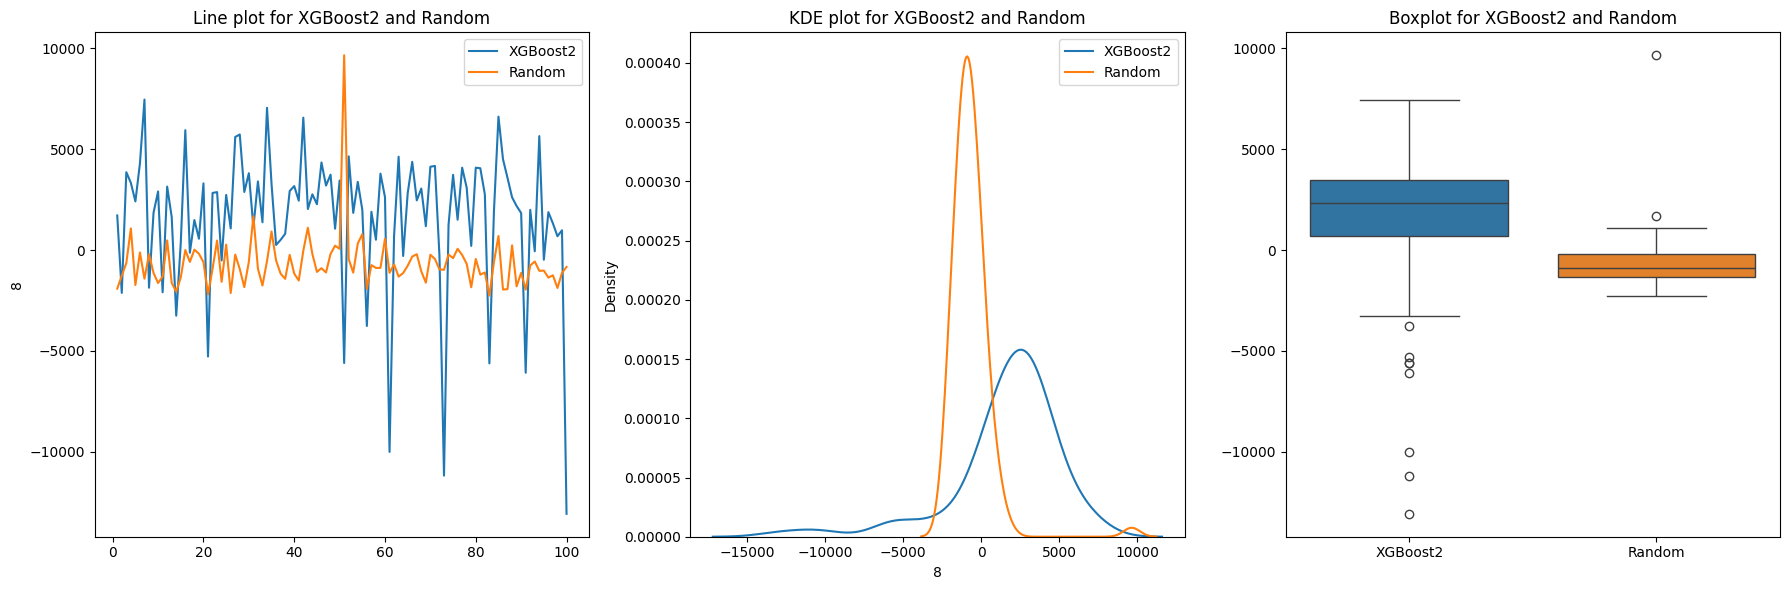

P_value_XGBoost2 3.497432317725132e-09
P_value_Random 2.7106242190202902e-14
not normal
There is a statistically significant difference
P-Value 9.521106397643388e-11



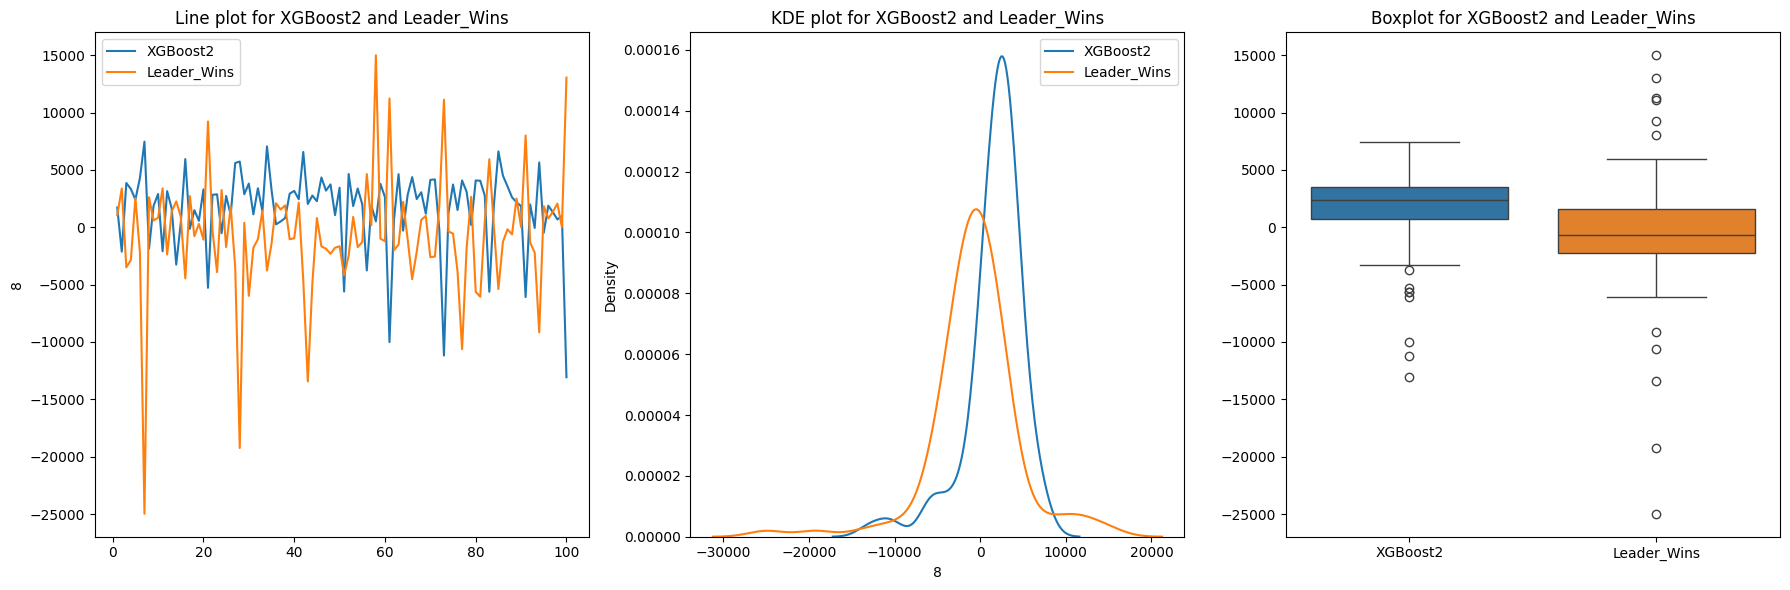

P_value_XGBoost2 3.497432317725132e-09
P_value_Leader_Wins 1.8589294793857175e-08
not normal
There is a statistically significant difference
P-Value 3.082967206861299e-05



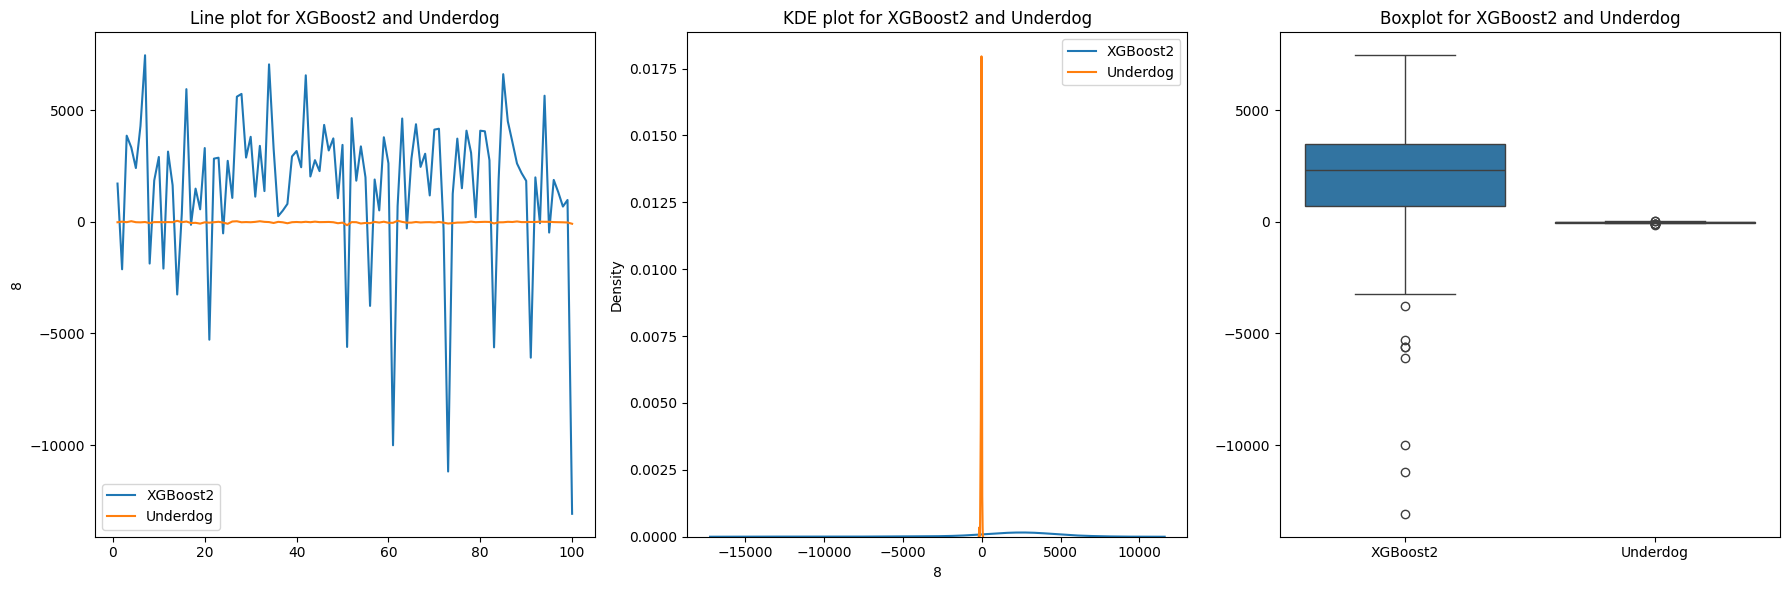

P_value_XGBoost2 3.497432317725132e-09
P_value_Underdog 1.4935972519931907e-05
not normal
There is a statistically significant difference
P-Value 3.2238025664929246e-08



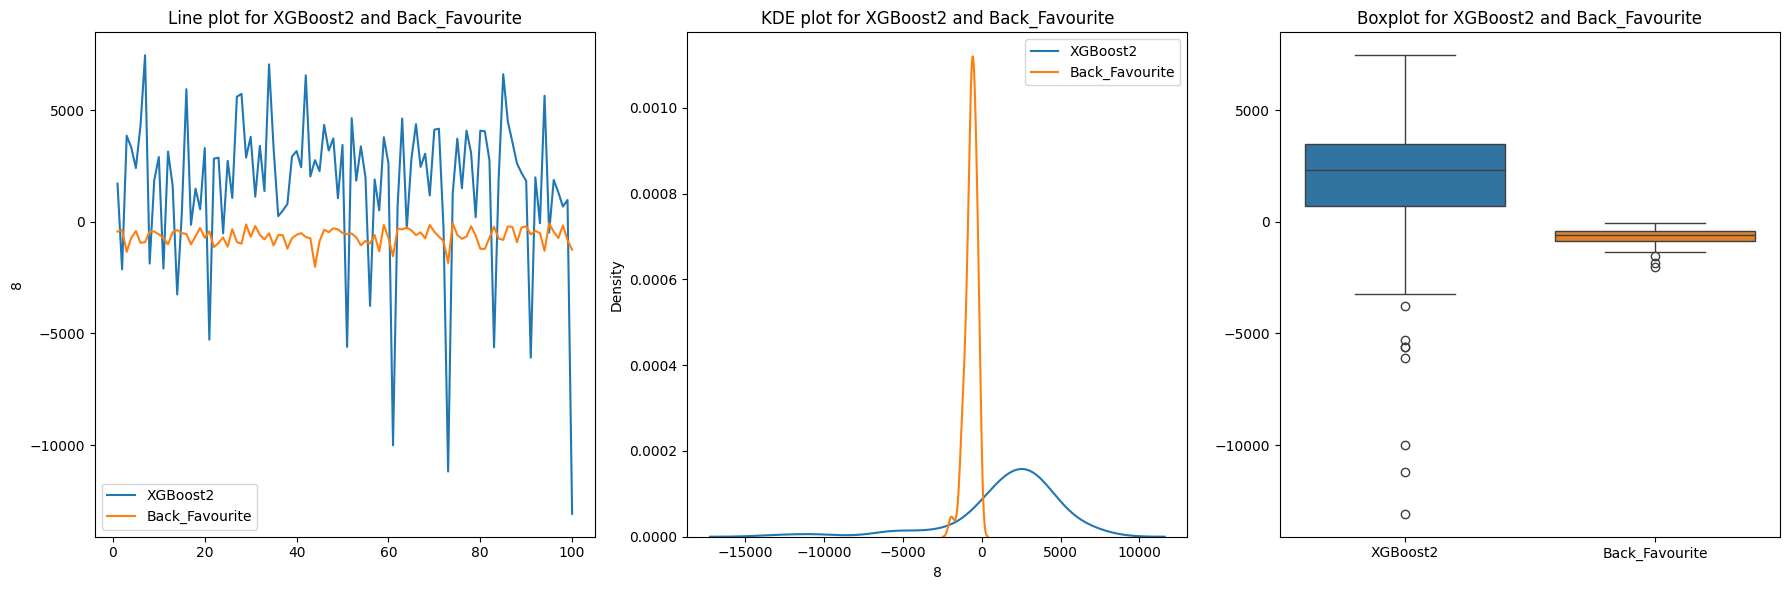

P_value_XGBoost2 3.497432317725132e-09
P_value_Back_Favourite 0.0003195777745457692
not normal
There is a statistically significant difference
P-Value 1.9746723075771296e-09



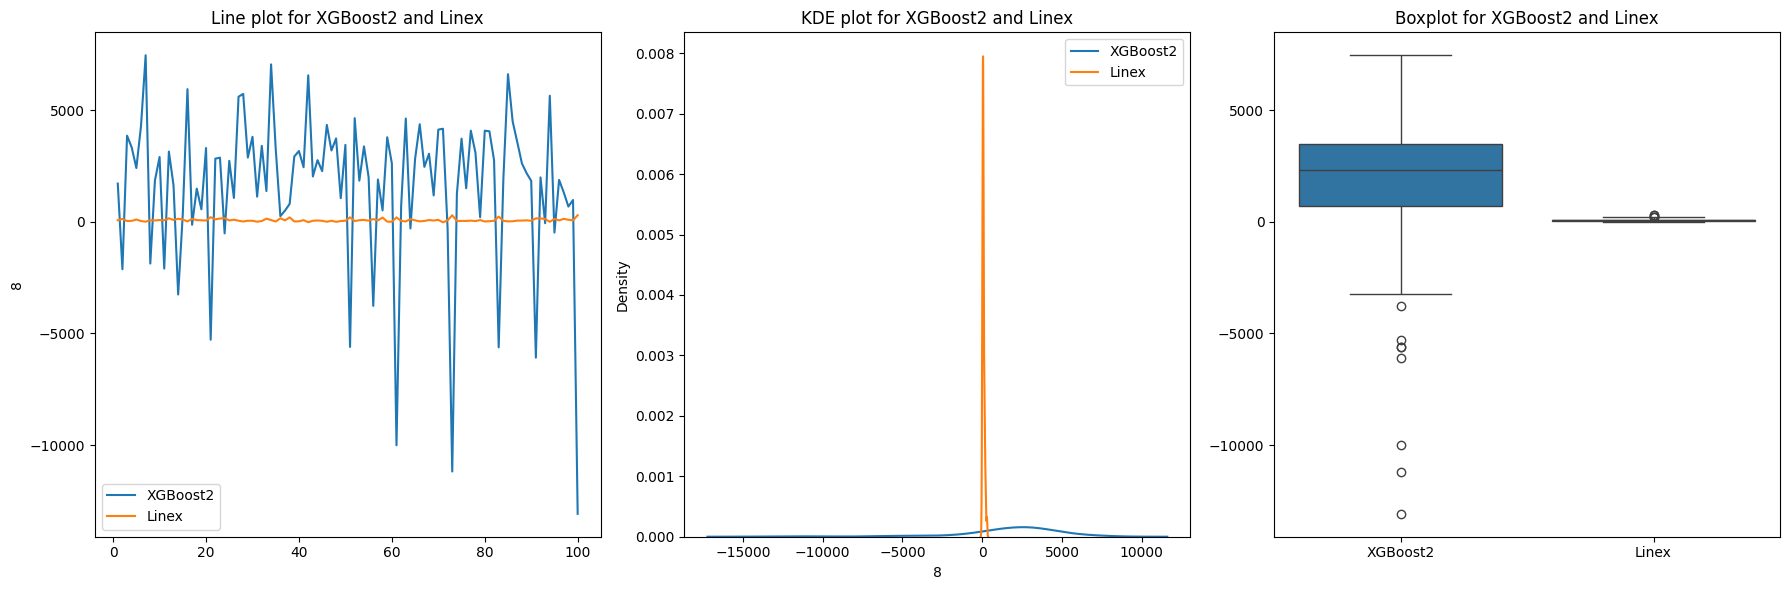

P_value_XGBoost2 3.497432317725132e-09
P_value_Linex 8.755593242229203e-07
not normal
There is a statistically significant difference
P-Value 7.696539755328664e-08



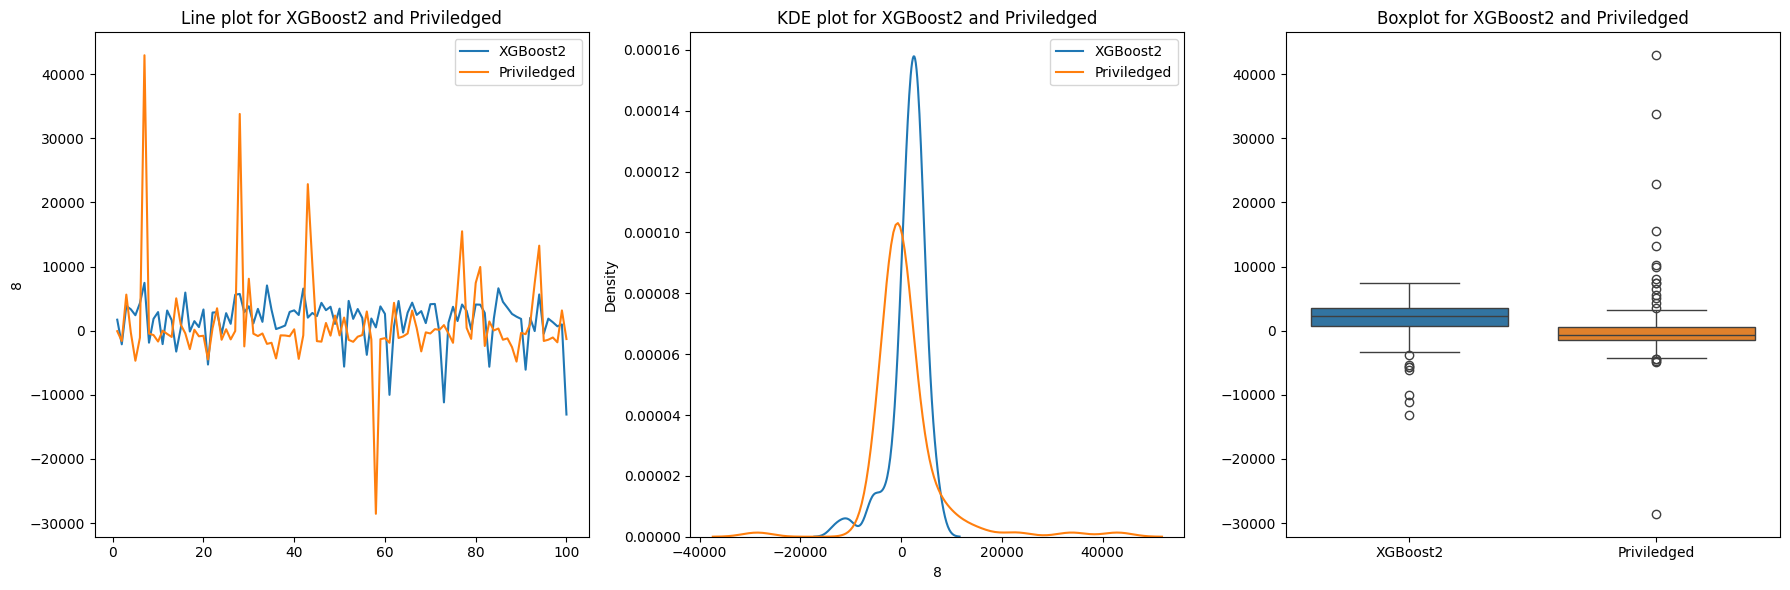

P_value_XGBoost2 3.497432317725132e-09
P_value_Priviledged 3.005127347594189e-15
not normal
There is a statistically significant difference
P-Value 0.008026609021899512



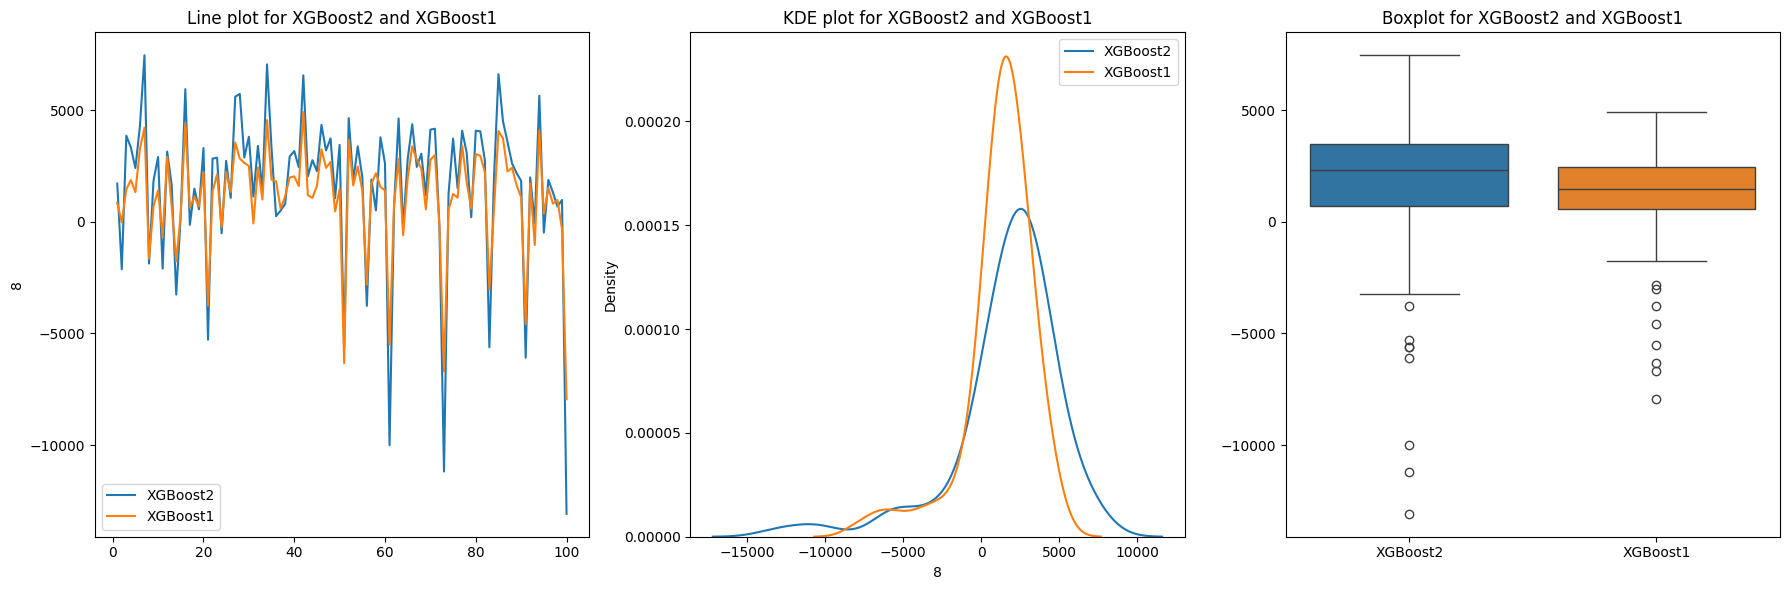

P_value_XGBoost2 3.497432317725132e-09
P_value_XGBoost1 7.752595510648852e-09
not normal
There is a statistically significant difference
P-Value 5.481399021085466e-06



In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Define agent names for easier access and readability
agent_names = [
    "Random",
    "Leader_Wins",
    "Underdog",
    "Back_Favourite",
    "Linex",
    "Priviledged",
    "XGBoost1",
    "XGBoost2",
]

# Define the indices of 'XGBoost1_NoBal' and 'XGBoost1_2000NoBal' in the agent_names list
xgboost_indices = [6, 7]

# Loop through 'XGBoost1_NoBal' and 'XGBoost1_2000NoBal'
for col_index in xgboost_indices:
    agent_balance = averaged_df.iloc[:, col_index]
    agent_name = agent_names[col_index]

    # Loop through all other agents
    for other_col_index in range(averaged_df.shape[1]):
        other_agent_name = agent_names[other_col_index]

        # Skip if the agent is the same
        if agent_name == other_agent_name:
            continue

        other_agent_balance = averaged_df.iloc[:, other_col_index]

        # Group the plots horizontally
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))

        # Line plot for the agent and the other agent
        sns.lineplot(data=agent_balance, ax=axes[0], label=agent_name)
        sns.lineplot(data=other_agent_balance, ax=axes[0], label=other_agent_name)
        axes[0].set_title(f"Line plot for {agent_name} and {other_agent_name}")
        axes[0].legend()

        # KDE plot for the distributions
        sns.kdeplot(agent_balance, ax=axes[1], label=agent_name)
        sns.kdeplot(other_agent_balance, ax=axes[1], label=other_agent_name)
        axes[1].set_title(f"KDE plot for {agent_name} and {other_agent_name}")
        axes[1].legend()

        # Boxplot for the two distributions
        combined_data = pd.concat(
            [
                agent_balance.rename(agent_name),
                other_agent_balance.rename(other_agent_name),
            ],
            axis=1,
        )
        sns.boxplot(data=combined_data, ax=axes[2])
        axes[2].set_title(f"Boxplot for {agent_name} and {other_agent_name}")

        plt.tight_layout()
        plt.show()

        # Check normality for both columns
        _, pvalue_agent = stats.shapiro(agent_balance)
        _, pvalue_other_agent = stats.shapiro(other_agent_balance)
        print(f"P_value_{agent_name}", pvalue_agent)
        print(f"P_value_{other_agent_name}", pvalue_other_agent)

        # If both are normally distributed
        if pvalue_agent > 0.05 and pvalue_other_agent > 0.05:
            print("normal")
            statistic, pvalue = stats.ttest_rel(agent_balance, other_agent_balance)
            if pvalue < 0.05:
                print("There is a statistically significant difference")
            else:
                print("There isn't a statistically significant difference")
        else:
            print("not normal")
            # If either or both are not normally distributed
            statistic, pvalue = stats.wilcoxon(agent_balance, other_agent_balance)
            if pvalue < 0.05:
                print("There is a statistically significant difference")
                print("P-Value", pvalue)
                print("")
            else:
                print("There isn't a statistically significant difference")

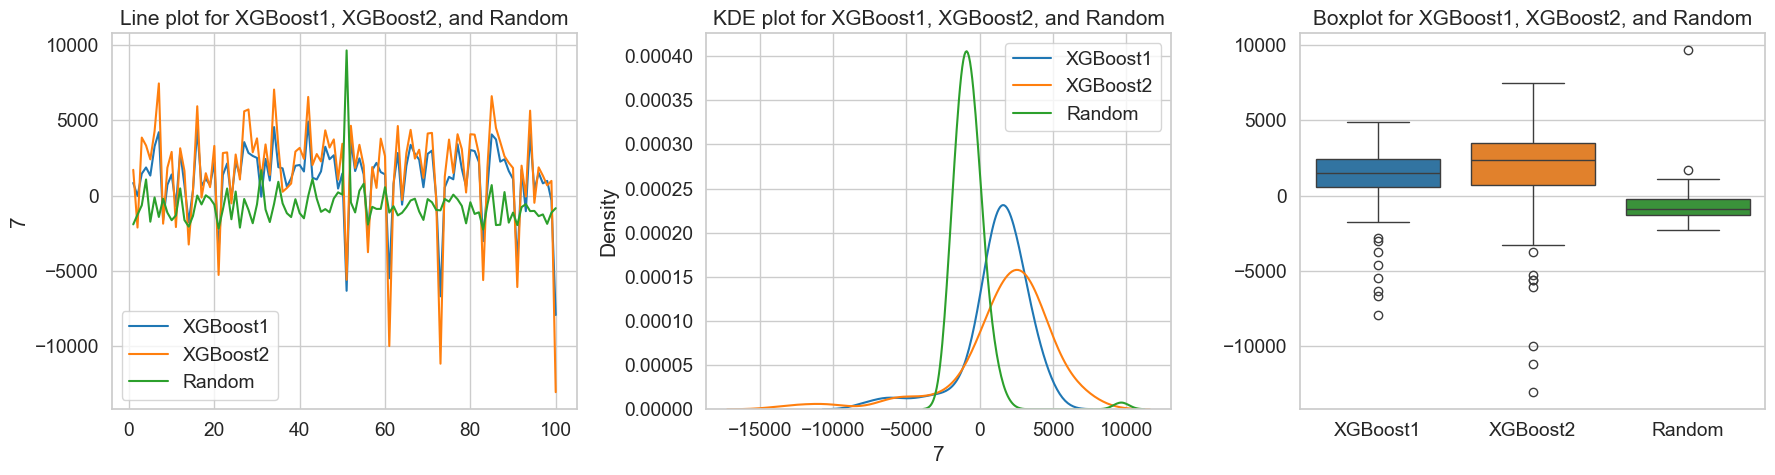

P_value_XGBoost1 7.752595510648852e-09
P_value_XGBoost2 3.497432317725132e-09
P_value_Random 2.7106242190202902e-14
not normal
There is a statistically significant difference
P-Value 4.839793458086771e-22



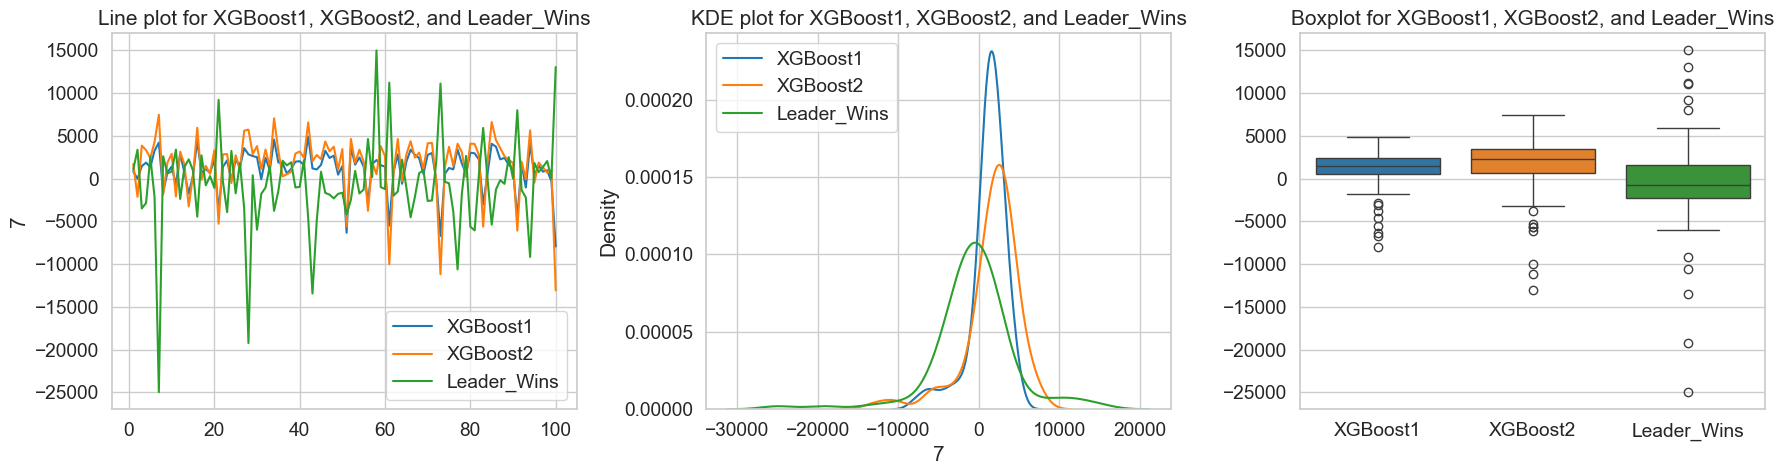

P_value_XGBoost1 7.752595510648852e-09
P_value_XGBoost2 3.497432317725132e-09
P_value_Leader_Wins 1.8589294793857175e-08
not normal
There is a statistically significant difference
P-Value 1.8052168876918036e-08



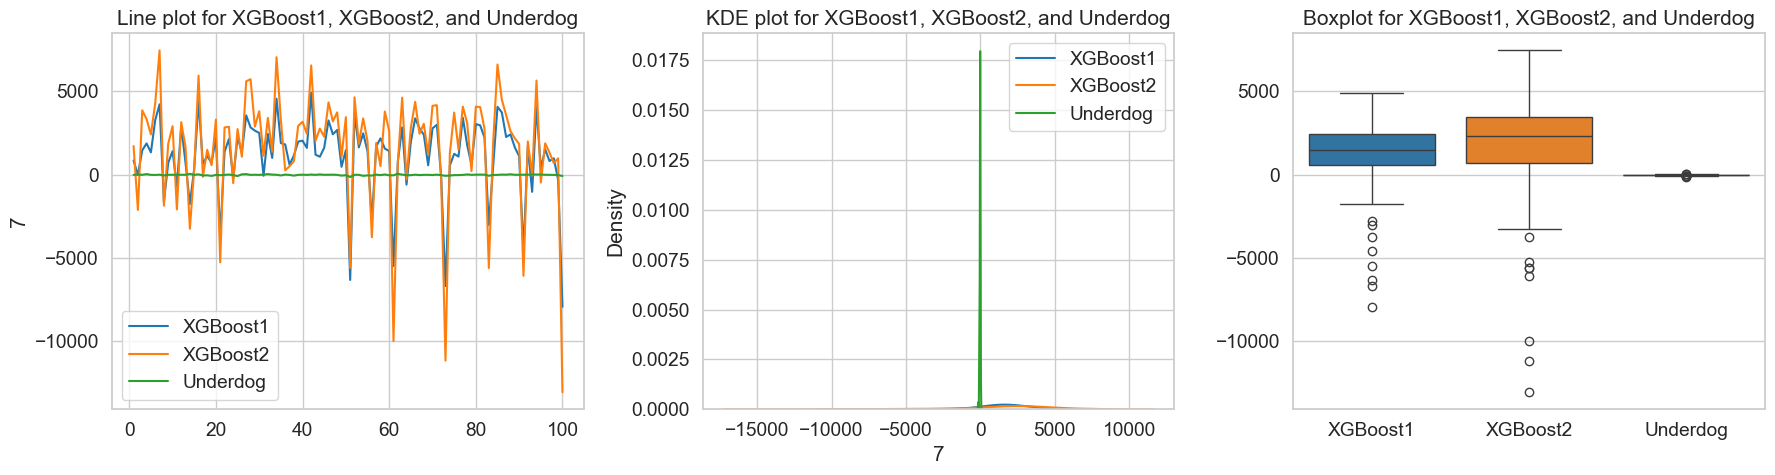

P_value_XGBoost1 7.752595510648852e-09
P_value_XGBoost2 3.497432317725132e-09
P_value_Underdog 1.4935972519931907e-05
not normal
There is a statistically significant difference
P-Value 8.792917614389022e-17



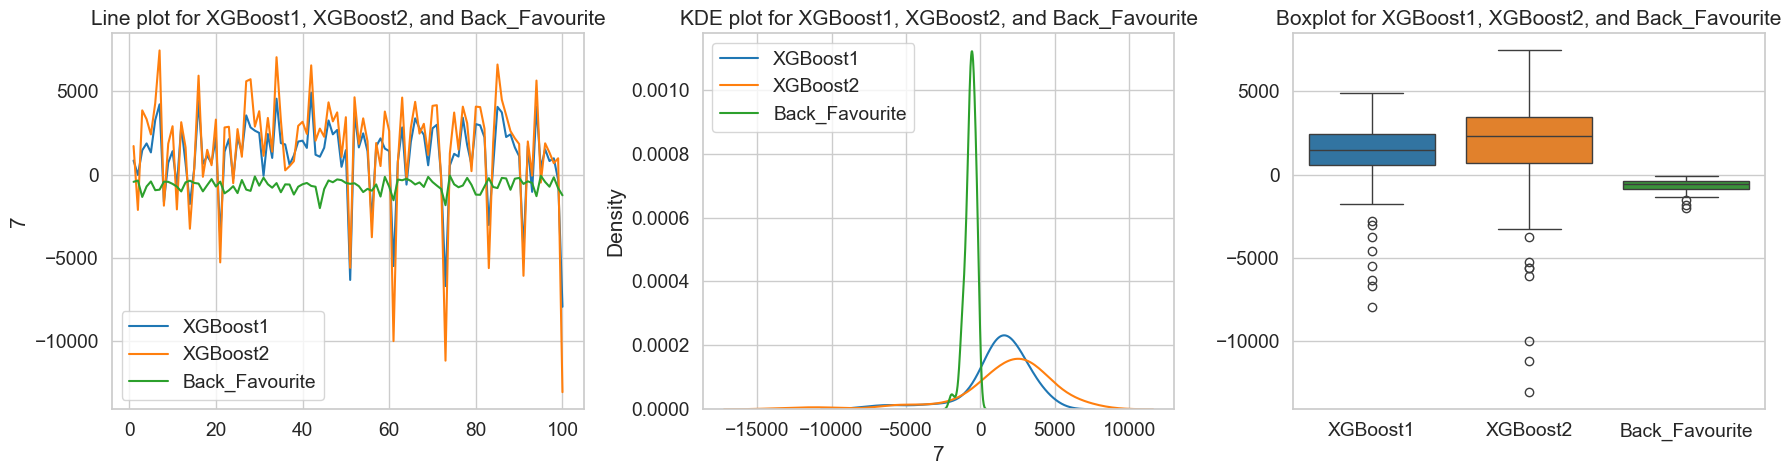

P_value_XGBoost1 7.752595510648852e-09
P_value_XGBoost2 3.497432317725132e-09
P_value_Back_Favourite 0.0003195777745457692
not normal
There is a statistically significant difference
P-Value 4.591868183286319e-21



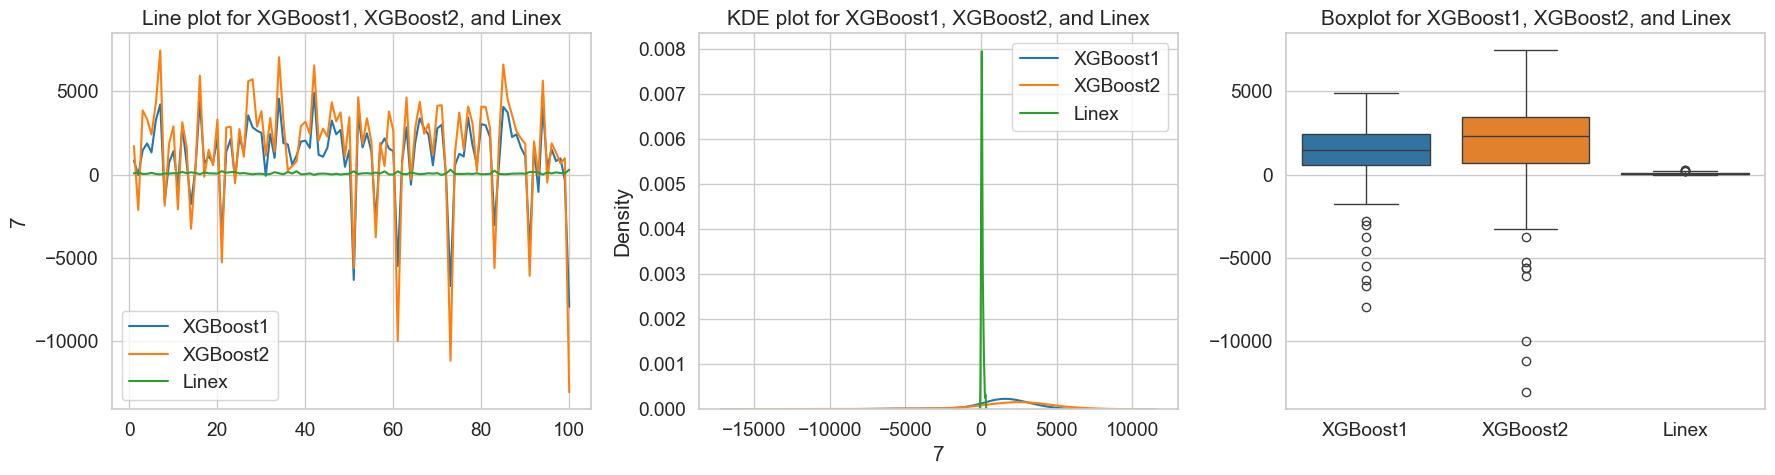

P_value_XGBoost1 7.752595510648852e-09
P_value_XGBoost2 3.497432317725132e-09
P_value_Linex 8.755593242229203e-07
not normal
There is a statistically significant difference
P-Value 8.792917614389022e-17



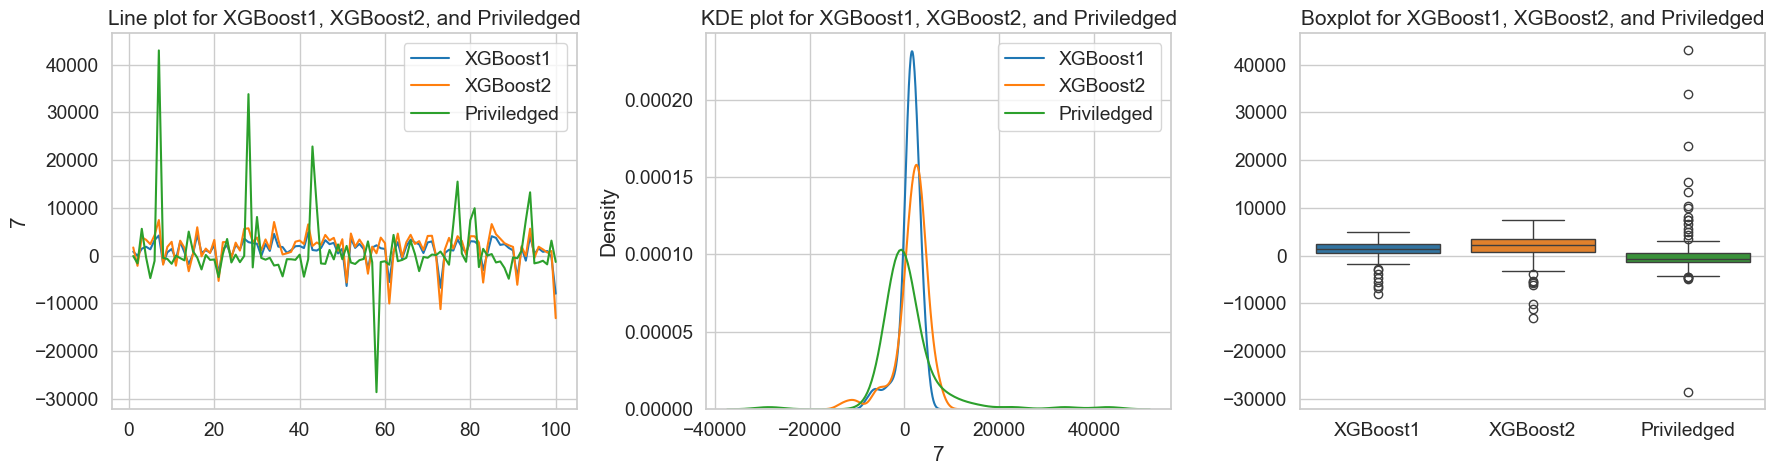

P_value_XGBoost1 7.752595510648852e-09
P_value_XGBoost2 3.497432317725132e-09
P_value_Priviledged 3.005127347594189e-15
not normal
There is a statistically significant difference
P-Value 5.659105477873052e-09



In [11]:
from scipy.stats import friedmanchisquare
from scipy.stats import wilcoxon
from statsmodels.stats.anova import AnovaRM
import numpy as np

xgboost2_avg_balance = averaged_df.iloc[:, 7]  # XGBoost2 column
xgboost1_avg_balance = averaged_df.iloc[:, 6]  # XGBoost1 column

# Define agent names for easier access and readability
agent_names = [
    "Random",
    "Leader_Wins",
    "Underdog",
    "Back_Favourite",
    "Linex",
    "Priviledged",
]

# Setting style and text scale for seaborn plots
sns.set_style("whitegrid")
sns.set_context(
    "notebook", font_scale=1.25
)  # Adjust the font_scale to increase text size

# Loop through columns 0-5 for other agents
for col_index in range(6):
    other_agent_balance = averaged_df.iloc[:, col_index]
    agent_name = agent_names[col_index]

    # Group the plots horizontally with modified height
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Decreased the height from 6 to 5

    # Line plot for XGBoost1, XGBoost2, and the other agent
    sns.lineplot(data=xgboost1_avg_balance, ax=axes[0], label="XGBoost1")
    sns.lineplot(data=xgboost2_avg_balance, ax=axes[0], label="XGBoost2")
    sns.lineplot(data=other_agent_balance, ax=axes[0], label=agent_name)
    axes[0].set_title(f"Line plot for XGBoost1, XGBoost2, and {agent_name}")
    axes[0].legend()

    # KDE plot for the distributions
    sns.kdeplot(xgboost1_avg_balance, ax=axes[1], label="XGBoost1")
    sns.kdeplot(xgboost2_avg_balance, ax=axes[1], label="XGBoost2")
    sns.kdeplot(other_agent_balance, ax=axes[1], label=agent_name)
    axes[1].set_title(f"KDE plot for XGBoost1, XGBoost2, and {agent_name}")
    axes[1].legend()

    # Boxplot for the three distributions
    combined_data = pd.concat(
        [
            xgboost1_avg_balance.rename("XGBoost1"),
            xgboost2_avg_balance.rename("XGBoost2"),
            other_agent_balance.rename(agent_name),
        ],
        axis=1,
    )
    sns.boxplot(data=combined_data, ax=axes[2])
    axes[2].set_title(f"Boxplot for XGBoost1, XGBoost2, and {agent_name}")

    plt.tight_layout()
    plt.show()

    # Check normality for all three columns
    _, pvalue_xgboost1 = stats.shapiro(xgboost1_avg_balance)
    _, pvalue_xgboost2 = stats.shapiro(xgboost2_avg_balance)
    _, pvalue_other_agent = stats.shapiro(other_agent_balance)
    print(f"P_value_XGBoost1", pvalue_xgboost1)
    print(f"P_value_XGBoost2", pvalue_xgboost2)
    print(f"P_value_{agent_name}", pvalue_other_agent)

    # If all are normally distributed
    if pvalue_xgboost1 > 0.05 and pvalue_xgboost2 > 0.05 and pvalue_other_agent > 0.05:
        print("normal")
        # Prepare data for AnovaRM
        data = pd.concat(
            [xgboost1_avg_balance, xgboost2_avg_balance, other_agent_balance], axis=1
        ).melt(var_name="group", value_name="value")
        data["subject"] = np.repeat(np.arange(len(xgboost1_avg_balance)), 3)
        # Perform the repeated measures ANOVA
        model = AnovaRM(data, "value", "subject", within=["group"])
        res = model.fit()
        print(res.summary())
    else:
        print("not normal")
        # If either or both are not normally distributed
        statistic, pvalue = friedmanchisquare(
            xgboost1_avg_balance, xgboost2_avg_balance, other_agent_balance
        )
        if pvalue < 0.05:
            print("There is a statistically significant difference")
            print("P-Value", pvalue)
            print("")
        else:
            print("There isn't a statistically significant difference")

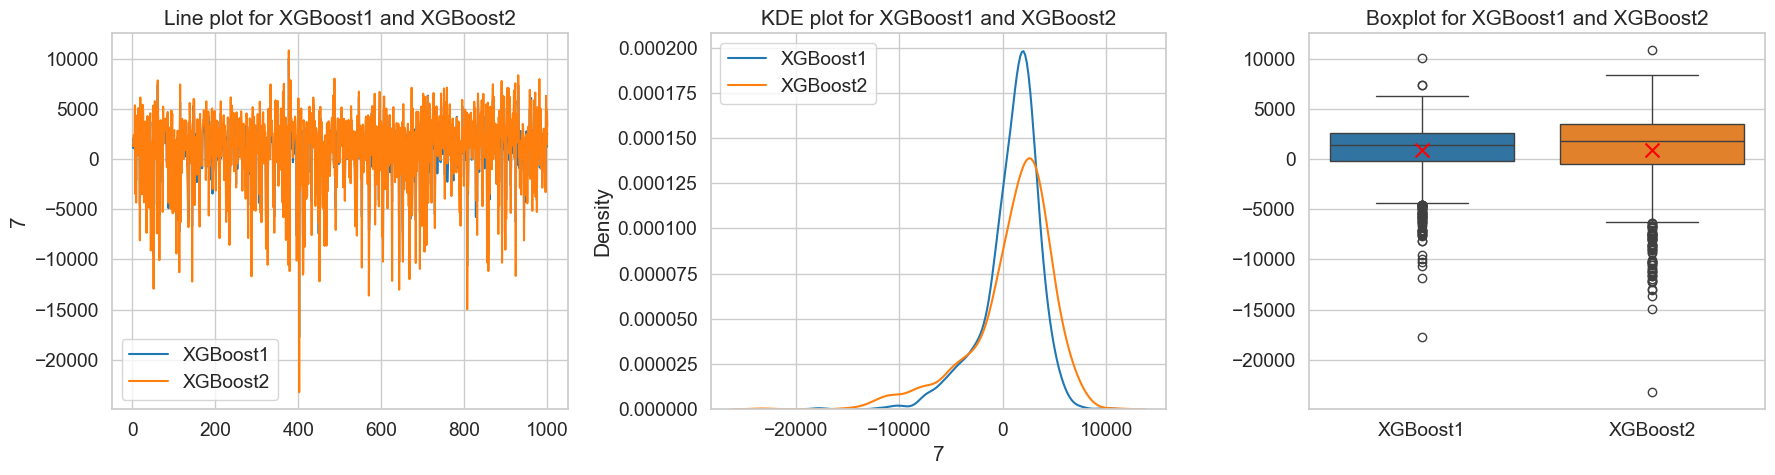

P_value_XGBoost1 3.527612885278457e-23
P_value_XGBoost2 1.7764236864368204e-24
not normal
There is a statistically significant difference
P-Value 0.0001173809224763994

XGBoost1    853.426057
XGBoost2    938.310651
dtype: float64


In [17]:
xgboost2_avg_balance = averaged_df.iloc[:, 7]  # XGBoost2 column
xgboost1_avg_balance = averaged_df.iloc[:, 6]  # XGBoost1 column

# Setting style and text scale for seaborn plots
sns.set_style("whitegrid")
sns.set_context(
    "notebook", font_scale=1.25
)  # Adjust the font_scale to increase text size

# Group the plots horizontally with modified height
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Decreased the height from 6 to 5

# Line plot for XGBoost1 and XGBoost2
sns.lineplot(data=xgboost1_avg_balance, ax=axes[0], label="XGBoost1")
sns.lineplot(data=xgboost2_avg_balance, ax=axes[0], label="XGBoost2")
axes[0].set_title("Line plot for XGBoost1 and XGBoost2")
axes[0].legend()

# KDE plot for the distributions
sns.kdeplot(xgboost1_avg_balance, ax=axes[1], label="XGBoost1")
sns.kdeplot(xgboost2_avg_balance, ax=axes[1], label="XGBoost2")
axes[1].set_title("KDE plot for XGBoost1 and XGBoost2")
axes[1].legend()

# # Boxplot for the two distributions
# combined_data = pd.concat(
#     [xgboost1_avg_balance.rename("XGBoost1"), xgboost2_avg_balance.rename("XGBoost2")],
#     axis=1,
# )
# sns.boxplot(data=combined_data, ax=axes[2])
# axes[2].set_title("Boxplot for XGBoost1 and XGBoost2")

# Boxplot for the two distributions
combined_data = pd.concat(
    [xgboost1_avg_balance.rename("XGBoost1"), xgboost2_avg_balance.rename("XGBoost2")],
    axis=1,
)
sns.boxplot(data=combined_data, ax=axes[2])

# Calculate the means
means = combined_data.mean()

# Add a black 'x' for the mean of each distribution
for i, mean in enumerate(means):
    axes[2].scatter(
        i, mean, marker="x", color="red", s=100, zorder=3
    )  # s parameter is for size of 'x', zorder=3 ensures the marker is drawn on top

axes[2].set_title("Boxplot for XGBoost1 and XGBoost2")

plt.tight_layout()
plt.show()

# Check normality for both columns
_, pvalue_xgboost1 = stats.shapiro(xgboost1_avg_balance)
_, pvalue_xgboost2 = stats.shapiro(xgboost2_avg_balance)
print("P_value_XGBoost1", pvalue_xgboost1)
print("P_value_XGBoost2", pvalue_xgboost2)

# If both are normally distributed
if pvalue_xgboost1 > 0.05 and pvalue_xgboost2 > 0.05:
    print("normal")
    statistic, pvalue = stats.ttest_ind(xgboost1_avg_balance, xgboost2_avg_balance)
    if pvalue < 0.05:
        print("There is a statistically significant difference")
    else:
        print("There isn't a statistically significant difference")
else:
    print("not normal")
    # If either or both are not normally distributed
    statistic, pvalue = stats.mannwhitneyu(xgboost1_avg_balance, xgboost2_avg_balance)
    if pvalue < 0.05:
        print("There is a statistically significant difference")
        print("P-Value", pvalue)
        print("")
    else:
        print("There isn't a statistically significant difference")


print(means)

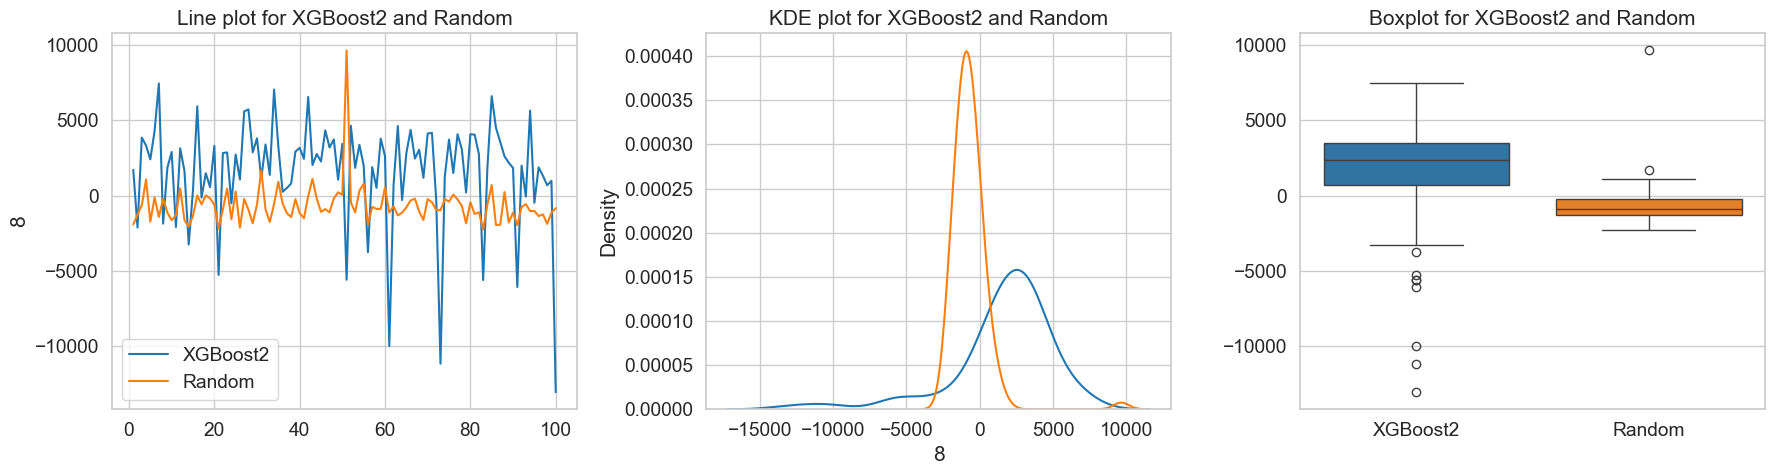

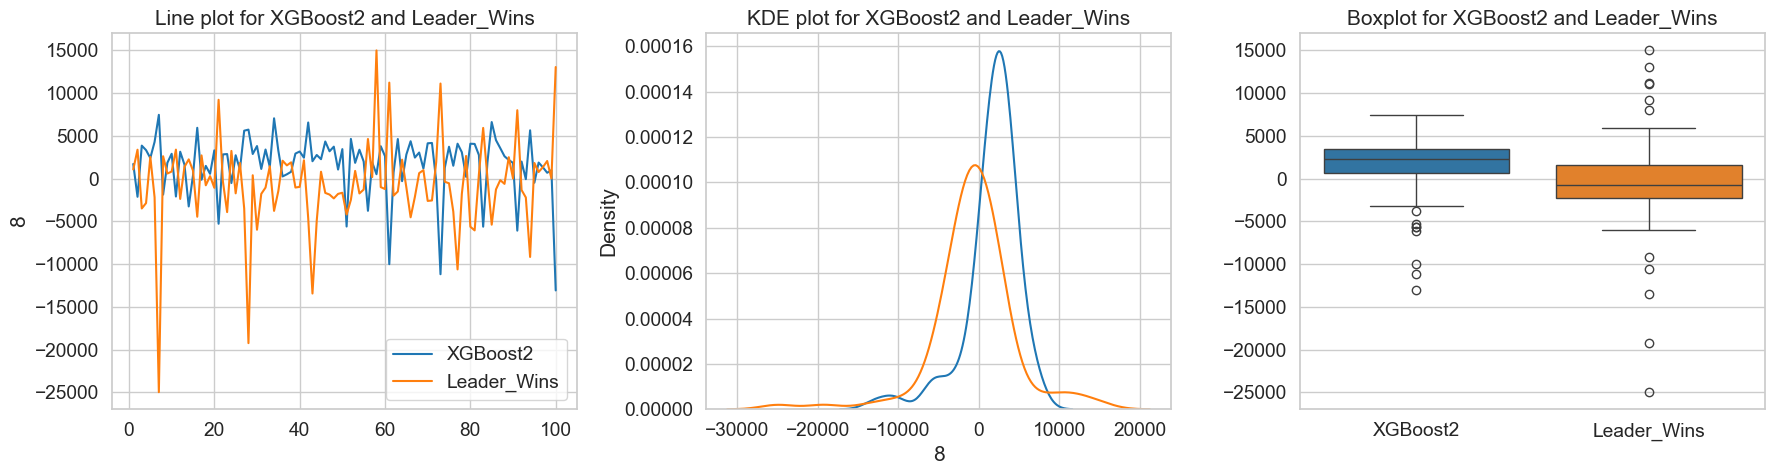

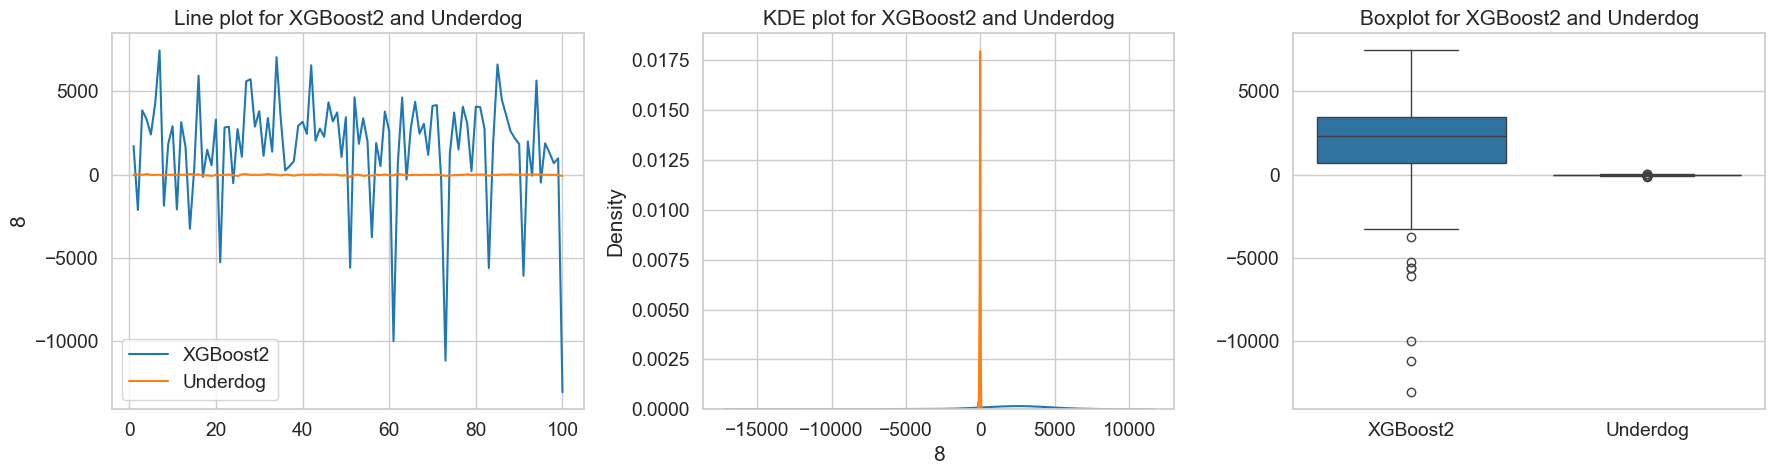

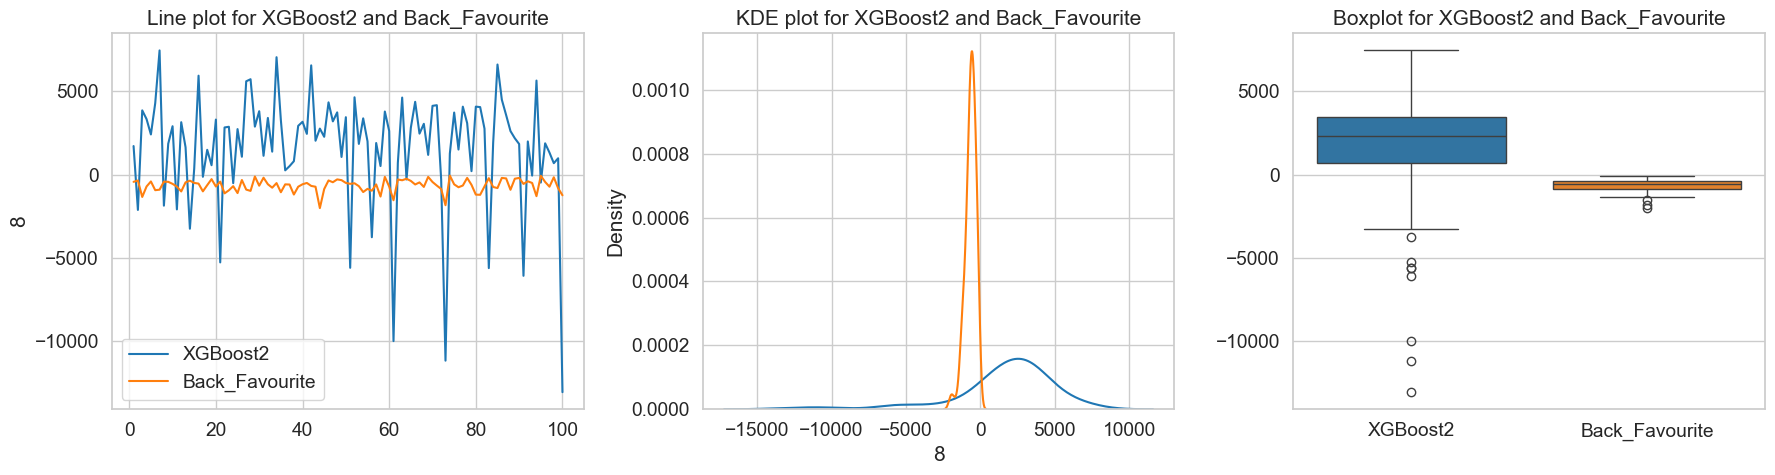

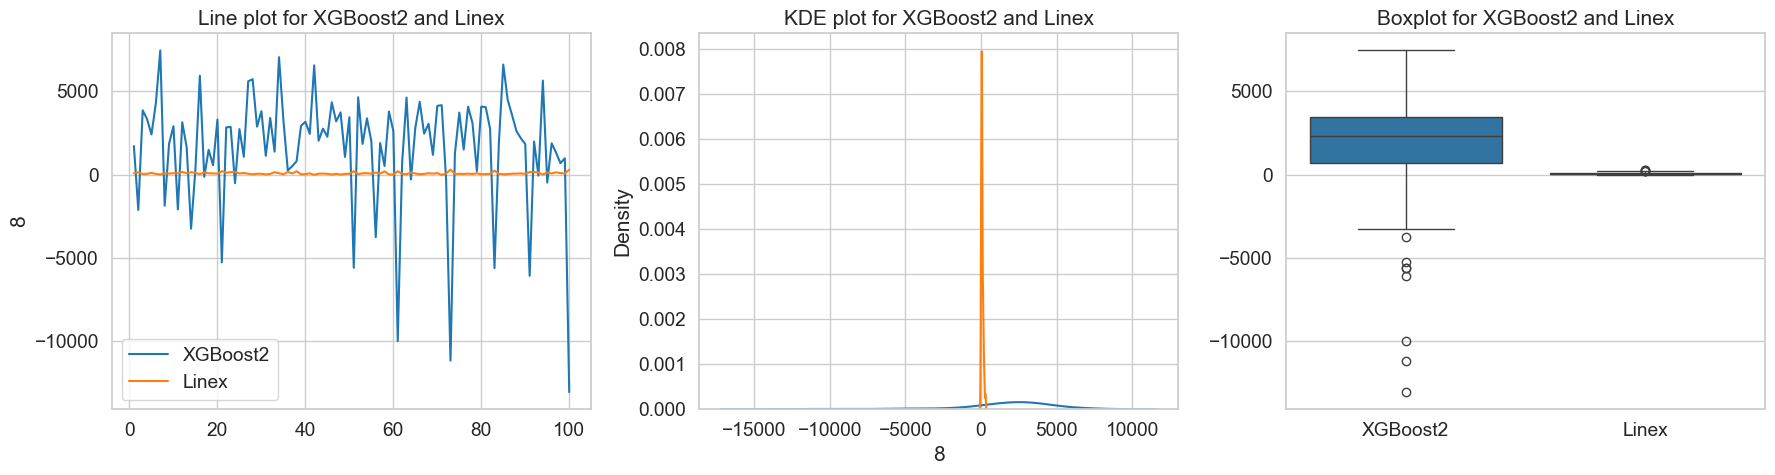

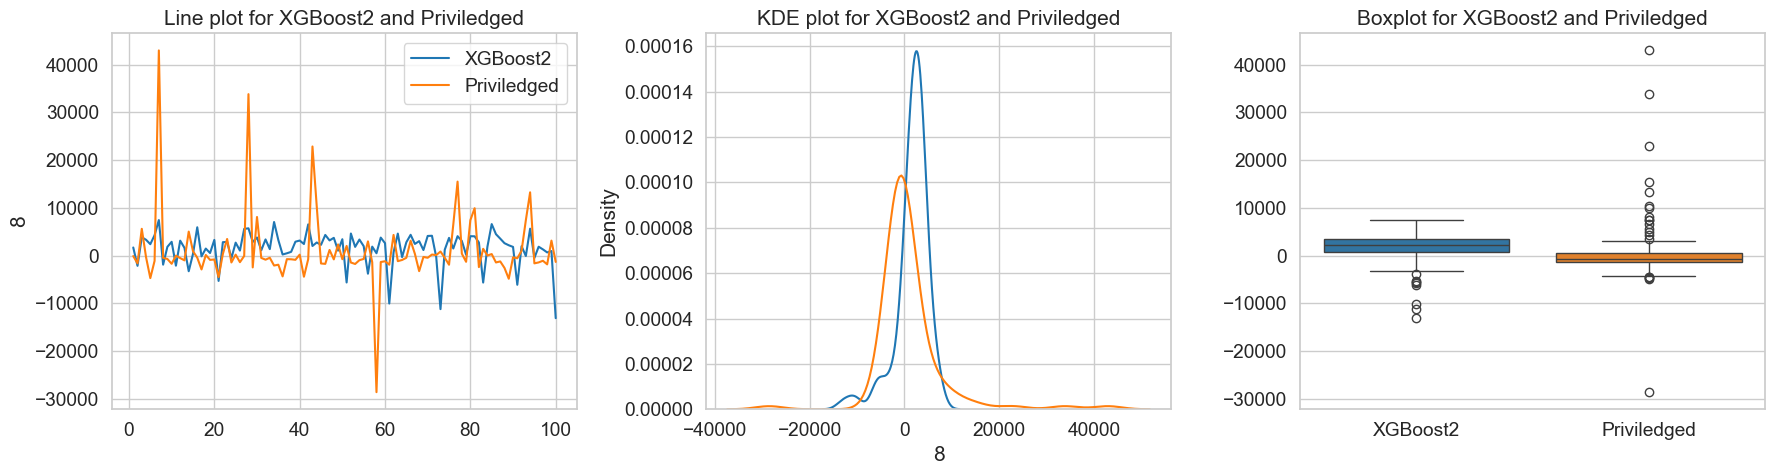

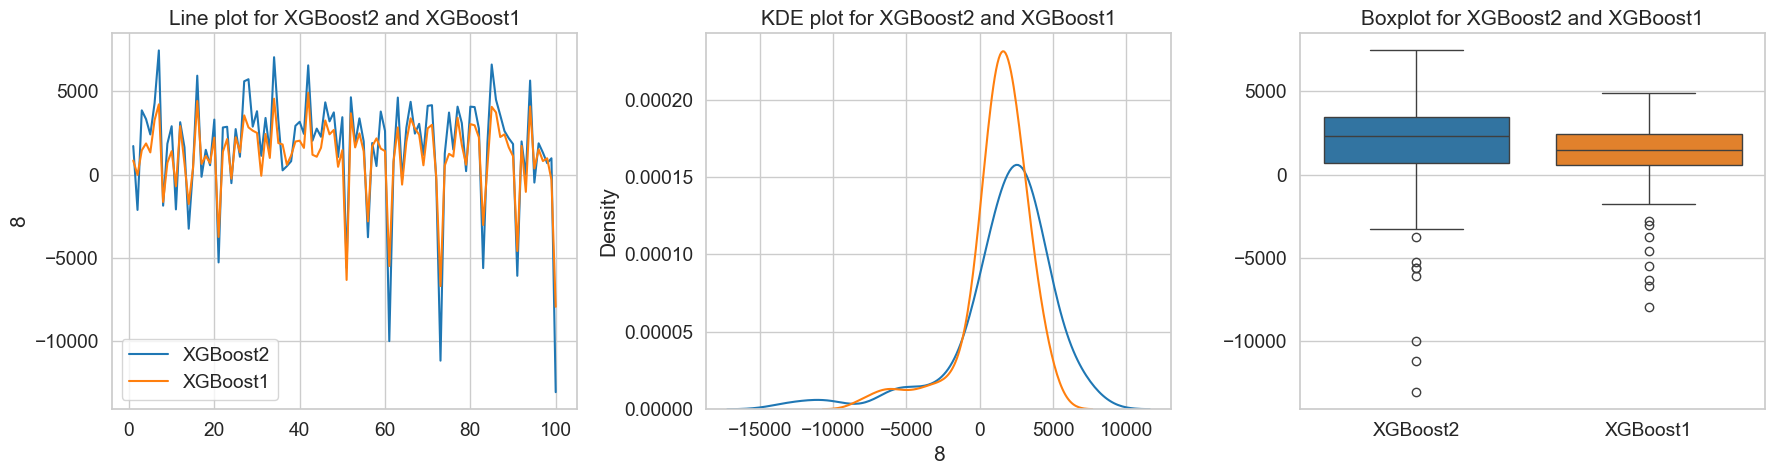

In [12]:
xgboost2_avg_balance = averaged_df.iloc[:, 7]  # XGBoost column

# Define agent names for easier access and readability
agent_names = ["Random", "Leader_Wins", "Underdog", "Back_Favourite", "Linex", "Priviledged", "XGBoost1"]

# Setting style and text scale for seaborn plots
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.25)  # Adjust the font_scale to increase text size

# Loop through columns 1-7 for other agents
for col_index in range(7):
    other_agent_balance = averaged_df.iloc[:, col_index]
    agent_name = agent_names[col_index]

    # Group the plots horizontally with modified height
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Decreased the height from 6 to 5

    # Line plot for XGBoost and the other agent
    sns.lineplot(data=xgboost2_avg_balance, ax=axes[0], label='XGBoost2')
    sns.lineplot(data=other_agent_balance, ax=axes[0], label=agent_name)
    axes[0].set_title(f'Line plot for XGBoost2 and {agent_name}')

    # KDE plot for the distributions
    sns.kdeplot(xgboost2_avg_balance, ax=axes[1], label='XGBoost2')
    sns.kdeplot(other_agent_balance, ax=axes[1], label=agent_name)
    axes[1].set_title(f'KDE plot for XGBoost2 and {agent_name}')

    # Boxplot for the two distributions
    combined_data = pd.concat([xgboost2_avg_balance.rename('XGBoost2'), 
                               other_agent_balance.rename(agent_name)], axis=1)
    sns.boxplot(data=combined_data, ax=axes[2])
    axes[2].set_title(f'Boxplot for XGBoost2 and {agent_name}')
    
    plt.tight_layout()
    plt.show()